# Analisis de Correlaciones

In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = px.data.iris()
iris

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145           3  
146           3  
147           3  
148           3  
149           3  

[150 rows x 6 columns]

In [10]:
cols = iris.drop('species',1).columns
cols

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_id'],
      dtype='object')

In [22]:
iris['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [59]:
px.colors.sequential.swatches(template='plotly_dark')

In [85]:
plt.style.use('bmh')
sns.set()
sns.set_palette('plasma_r')

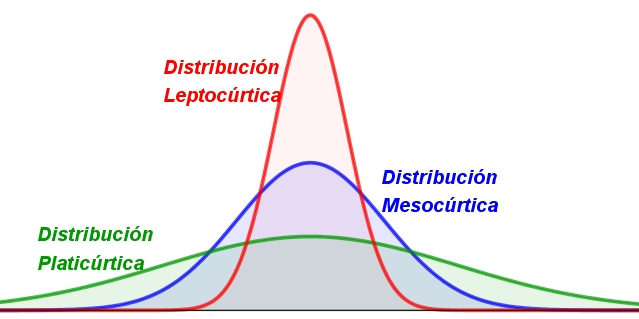

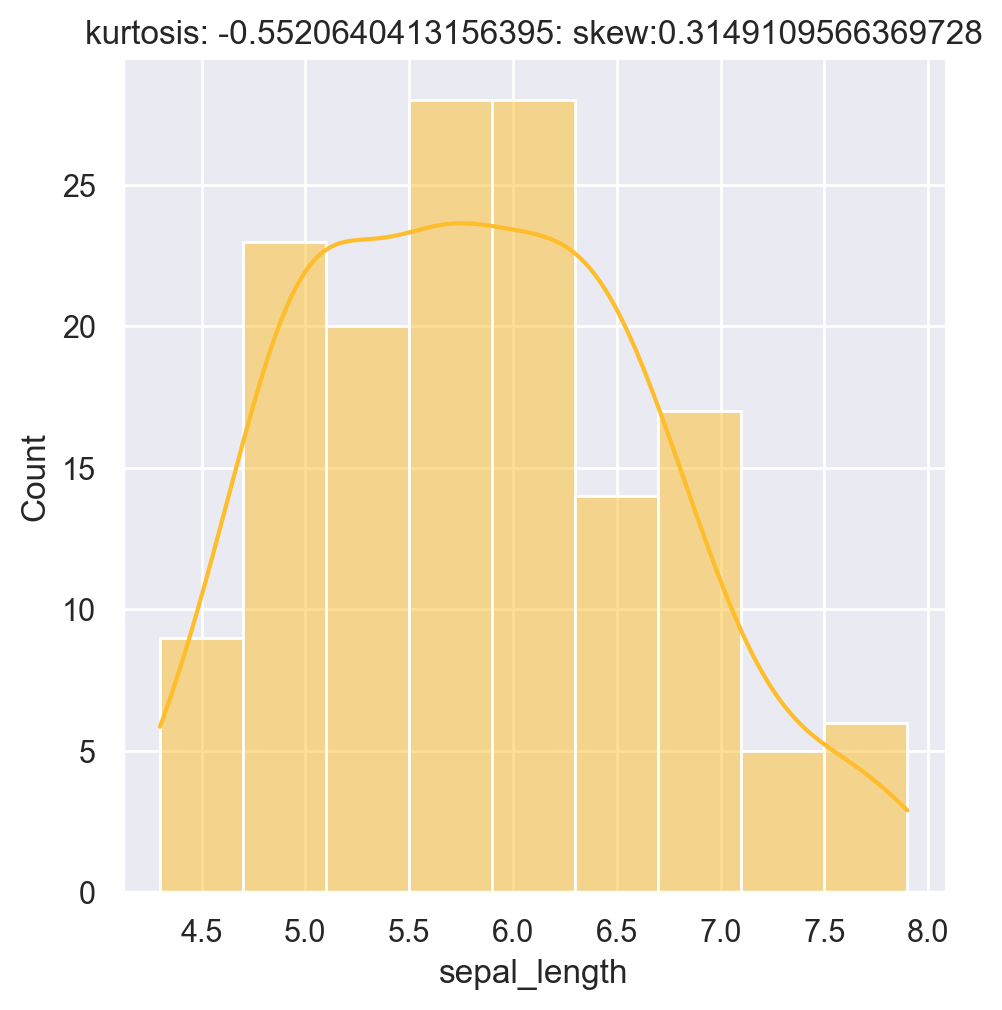

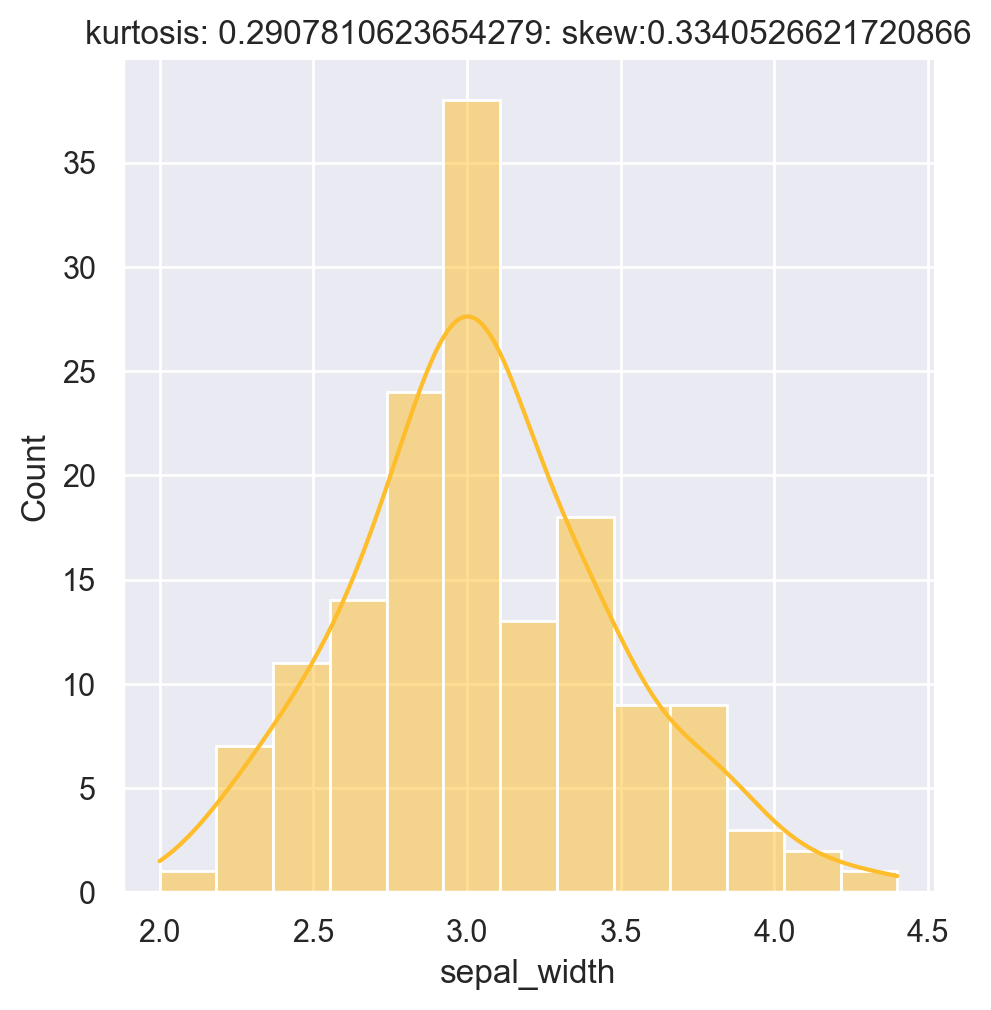

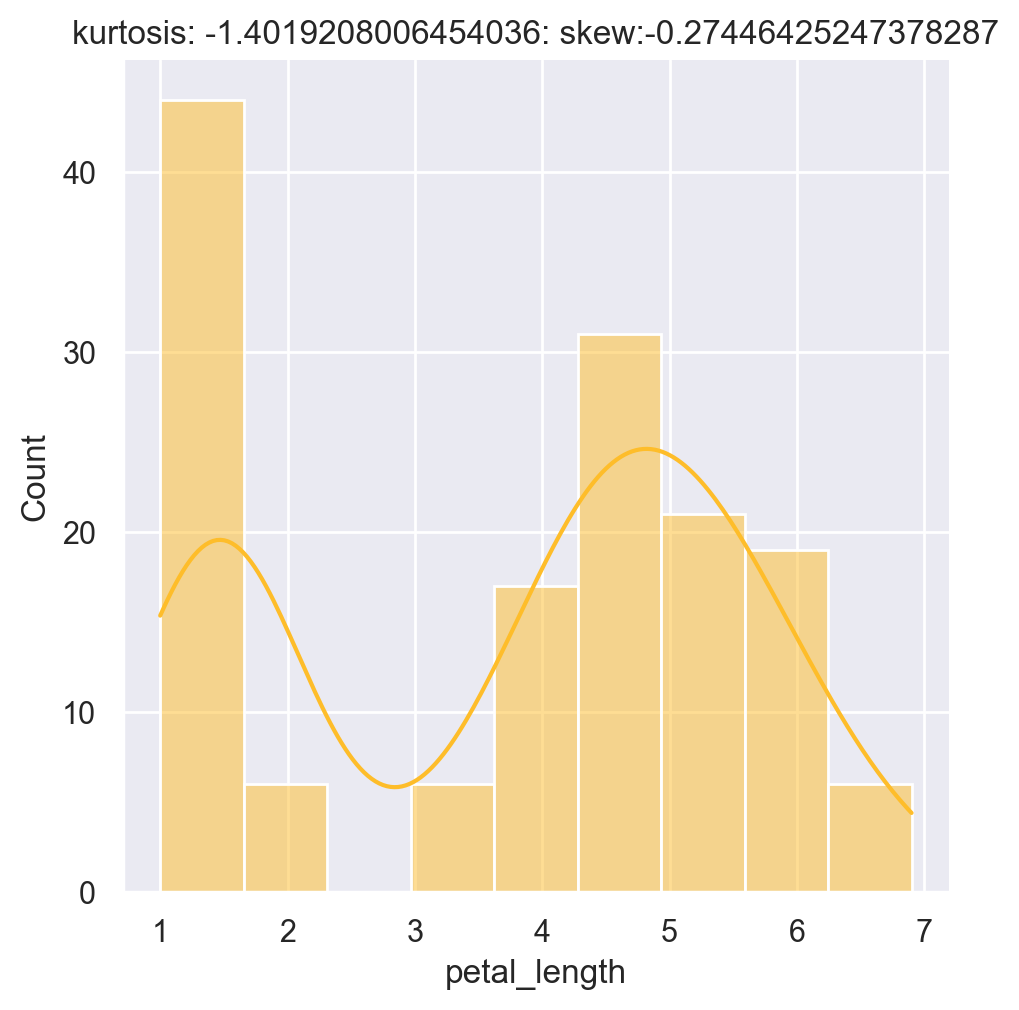

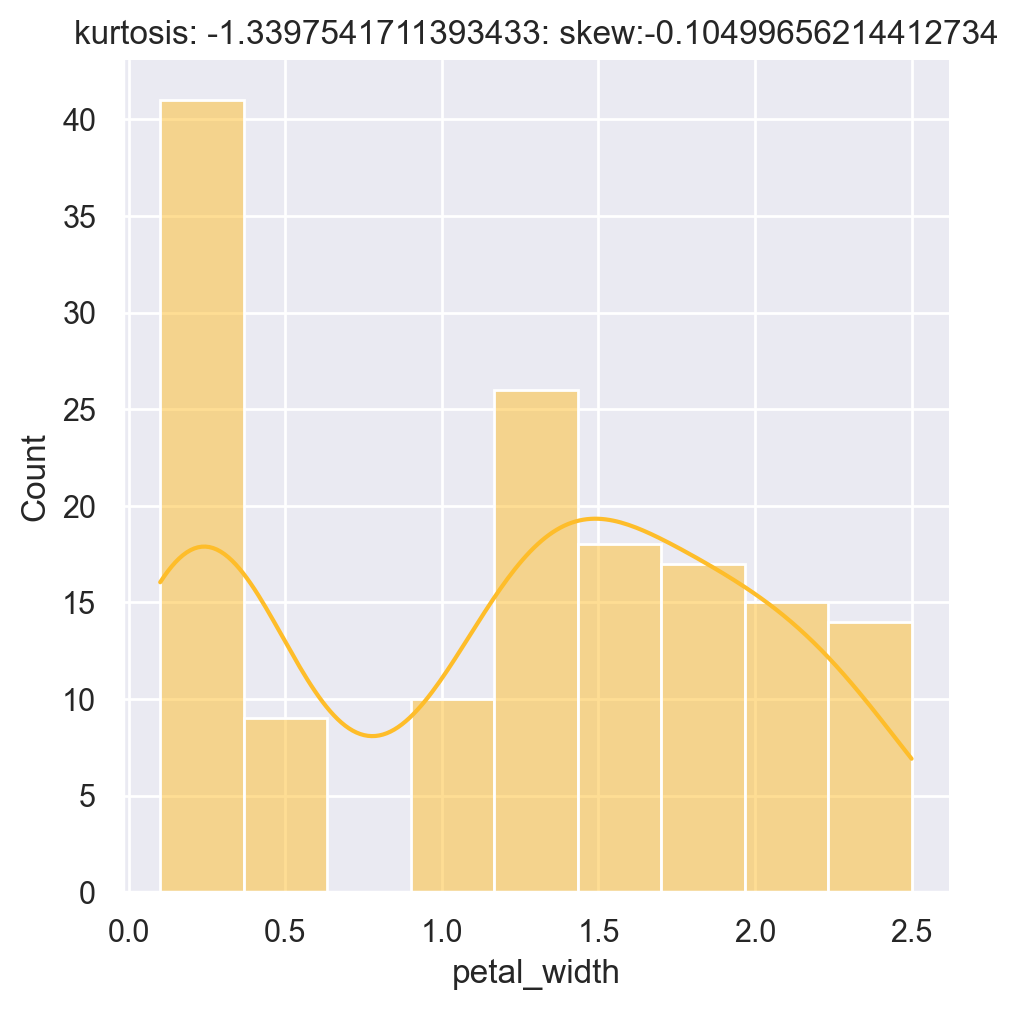

In [86]:
for i in cols:
    sns.displot(iris[i], kde=True)
    plt.title(f'kurtosis: {iris[i].kurt()}: skew:{iris[i].skew()}')

In [75]:
cols = ['sepal_length','sepal_width','petal_length','petal_width']

In [76]:
cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

<Figure size 1920x1440 with 0 Axes>

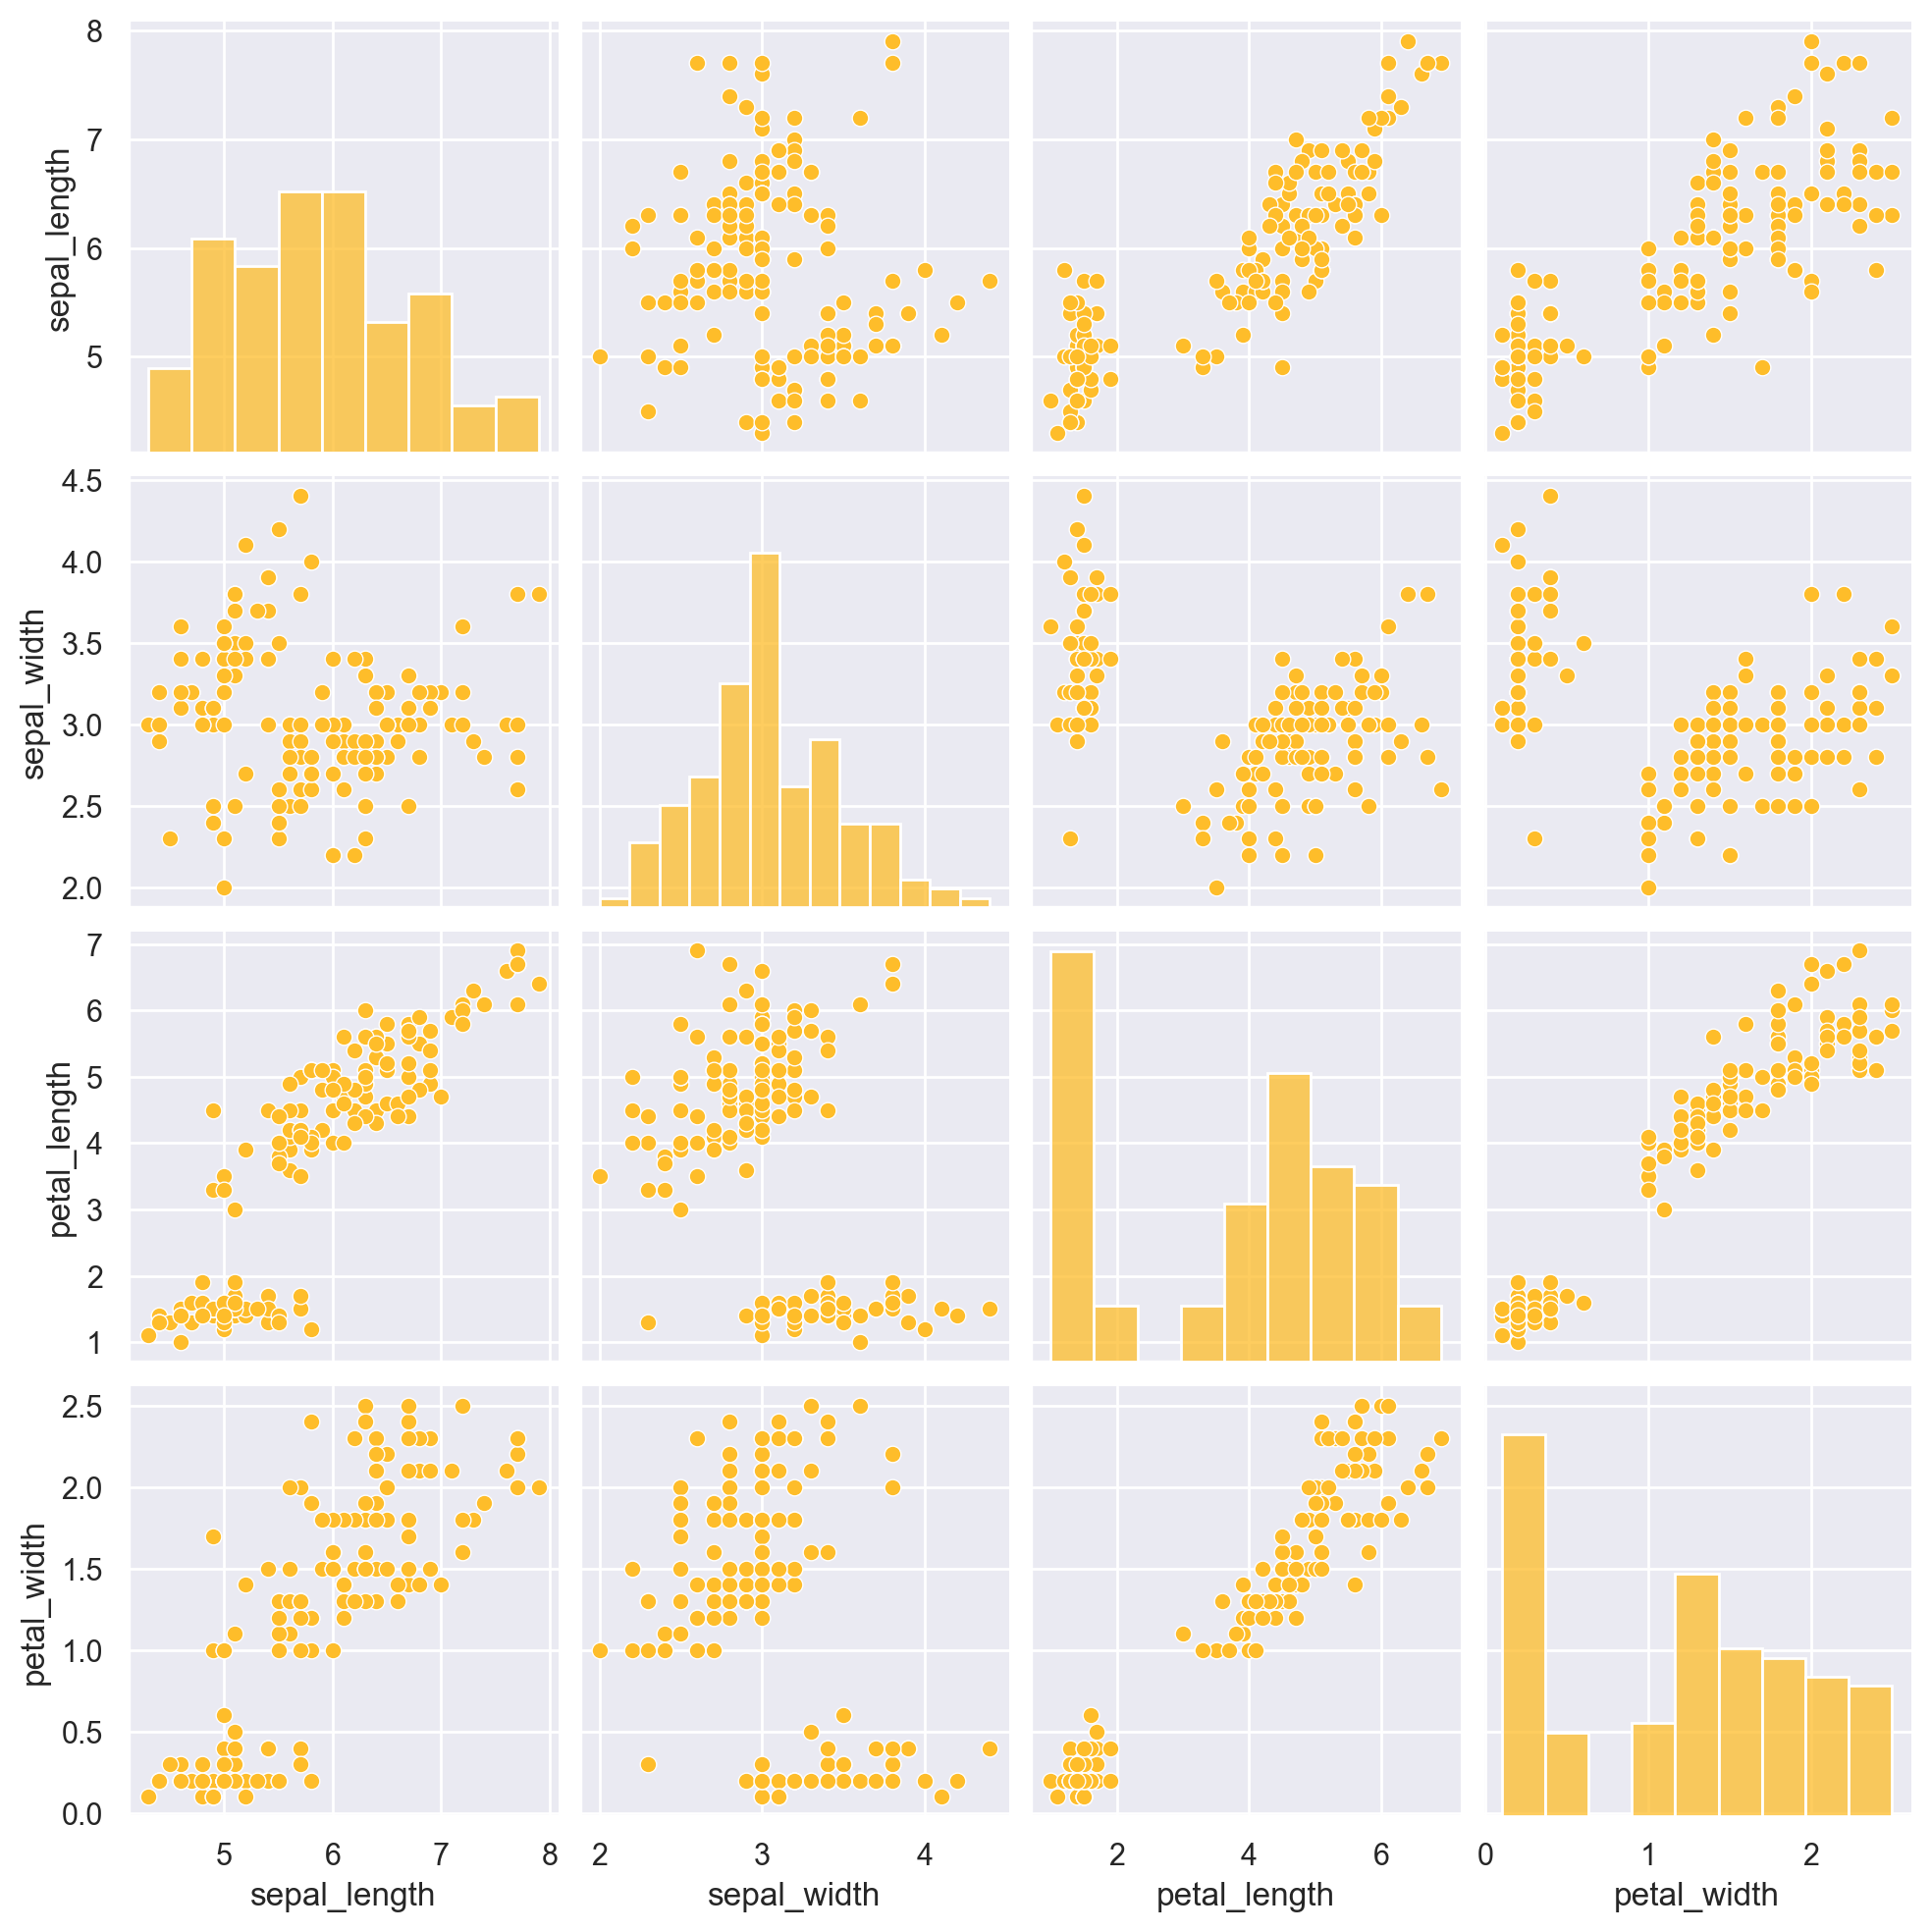

In [97]:
plt.figure(dpi=300)
fig = sns.pairplot(iris[cols])
fig.savefig('IMAGE.jpg')

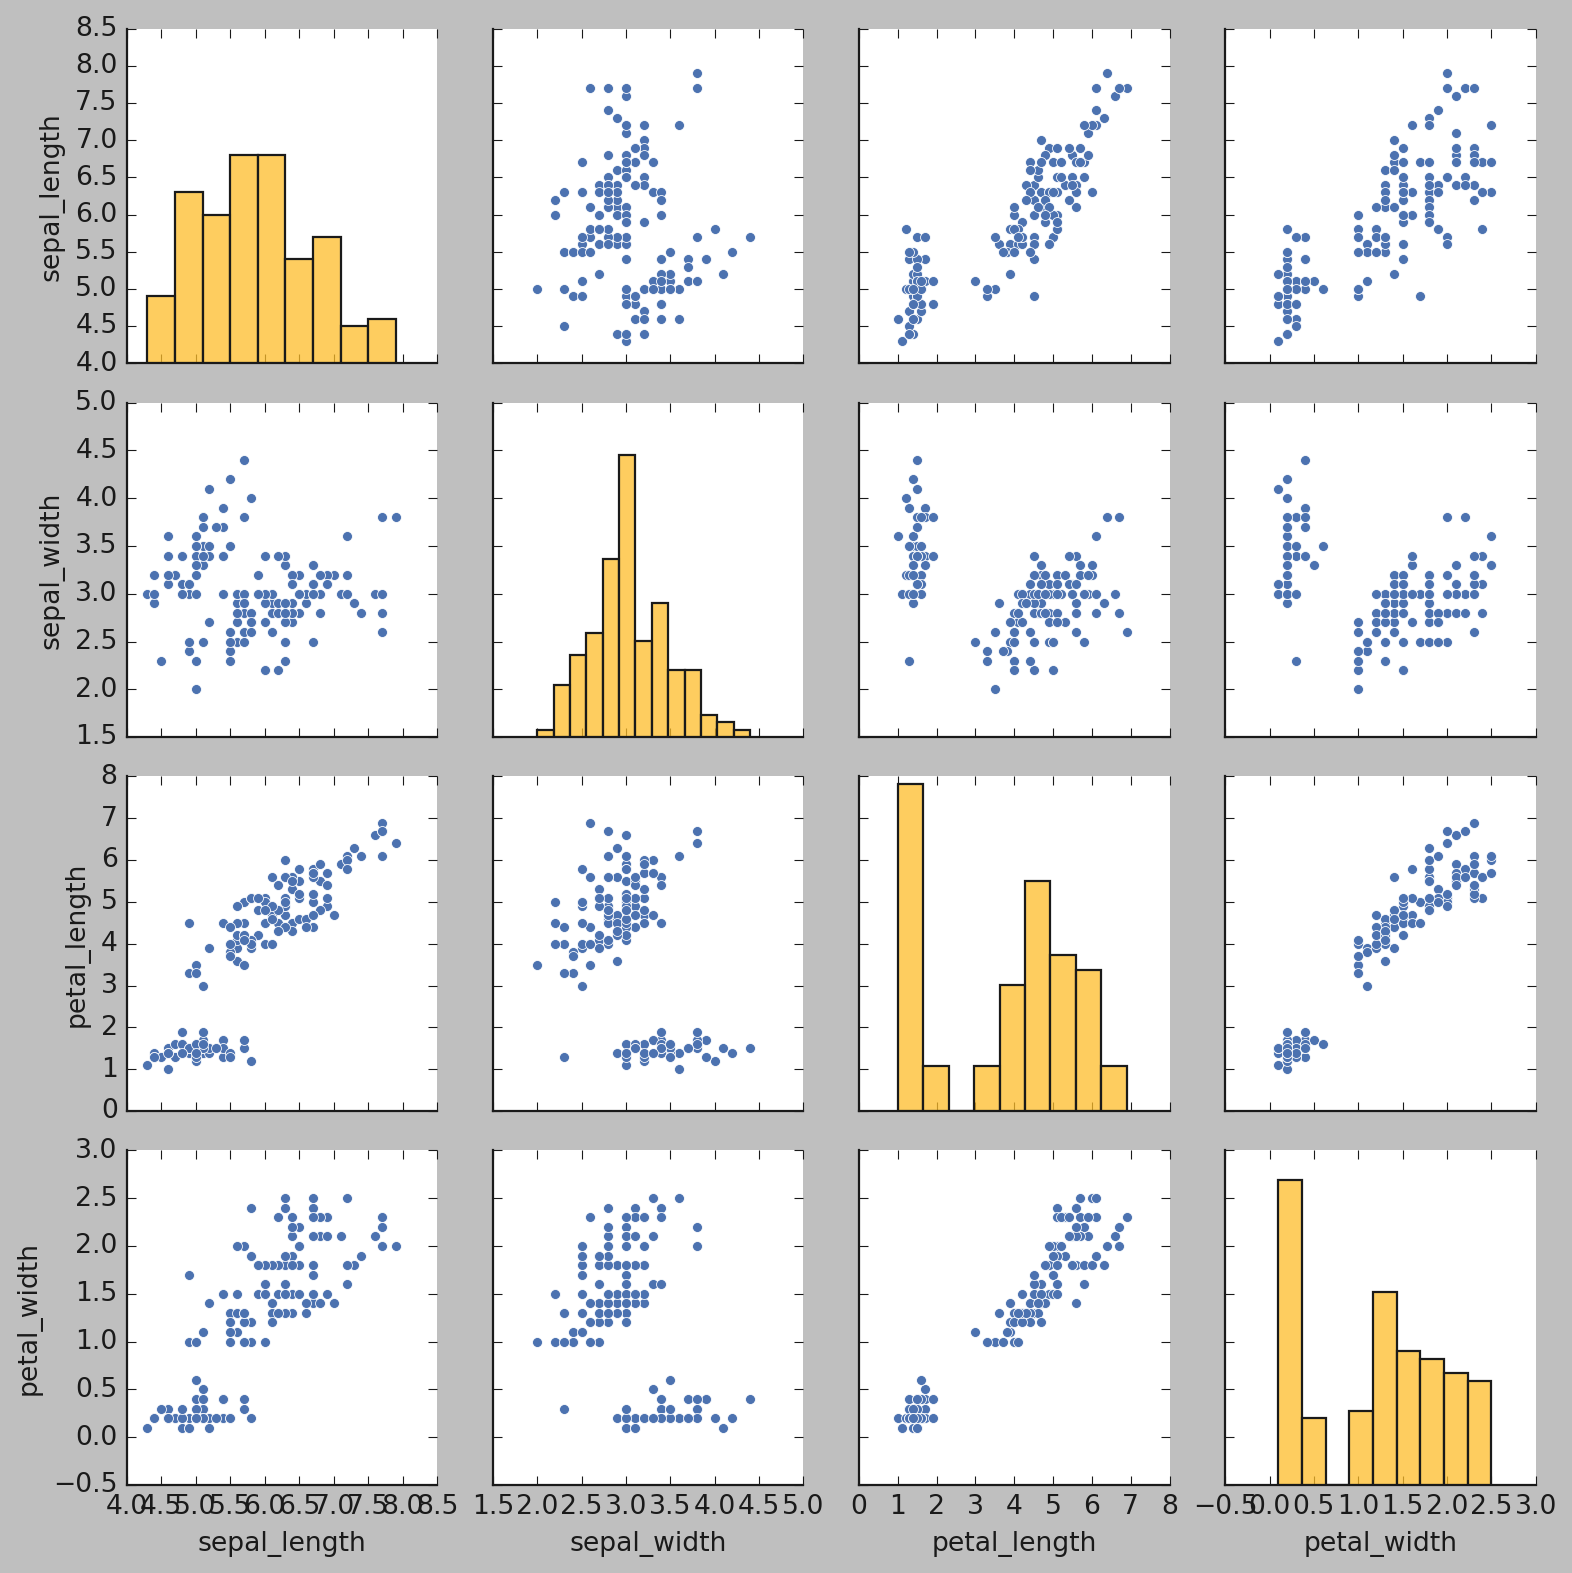

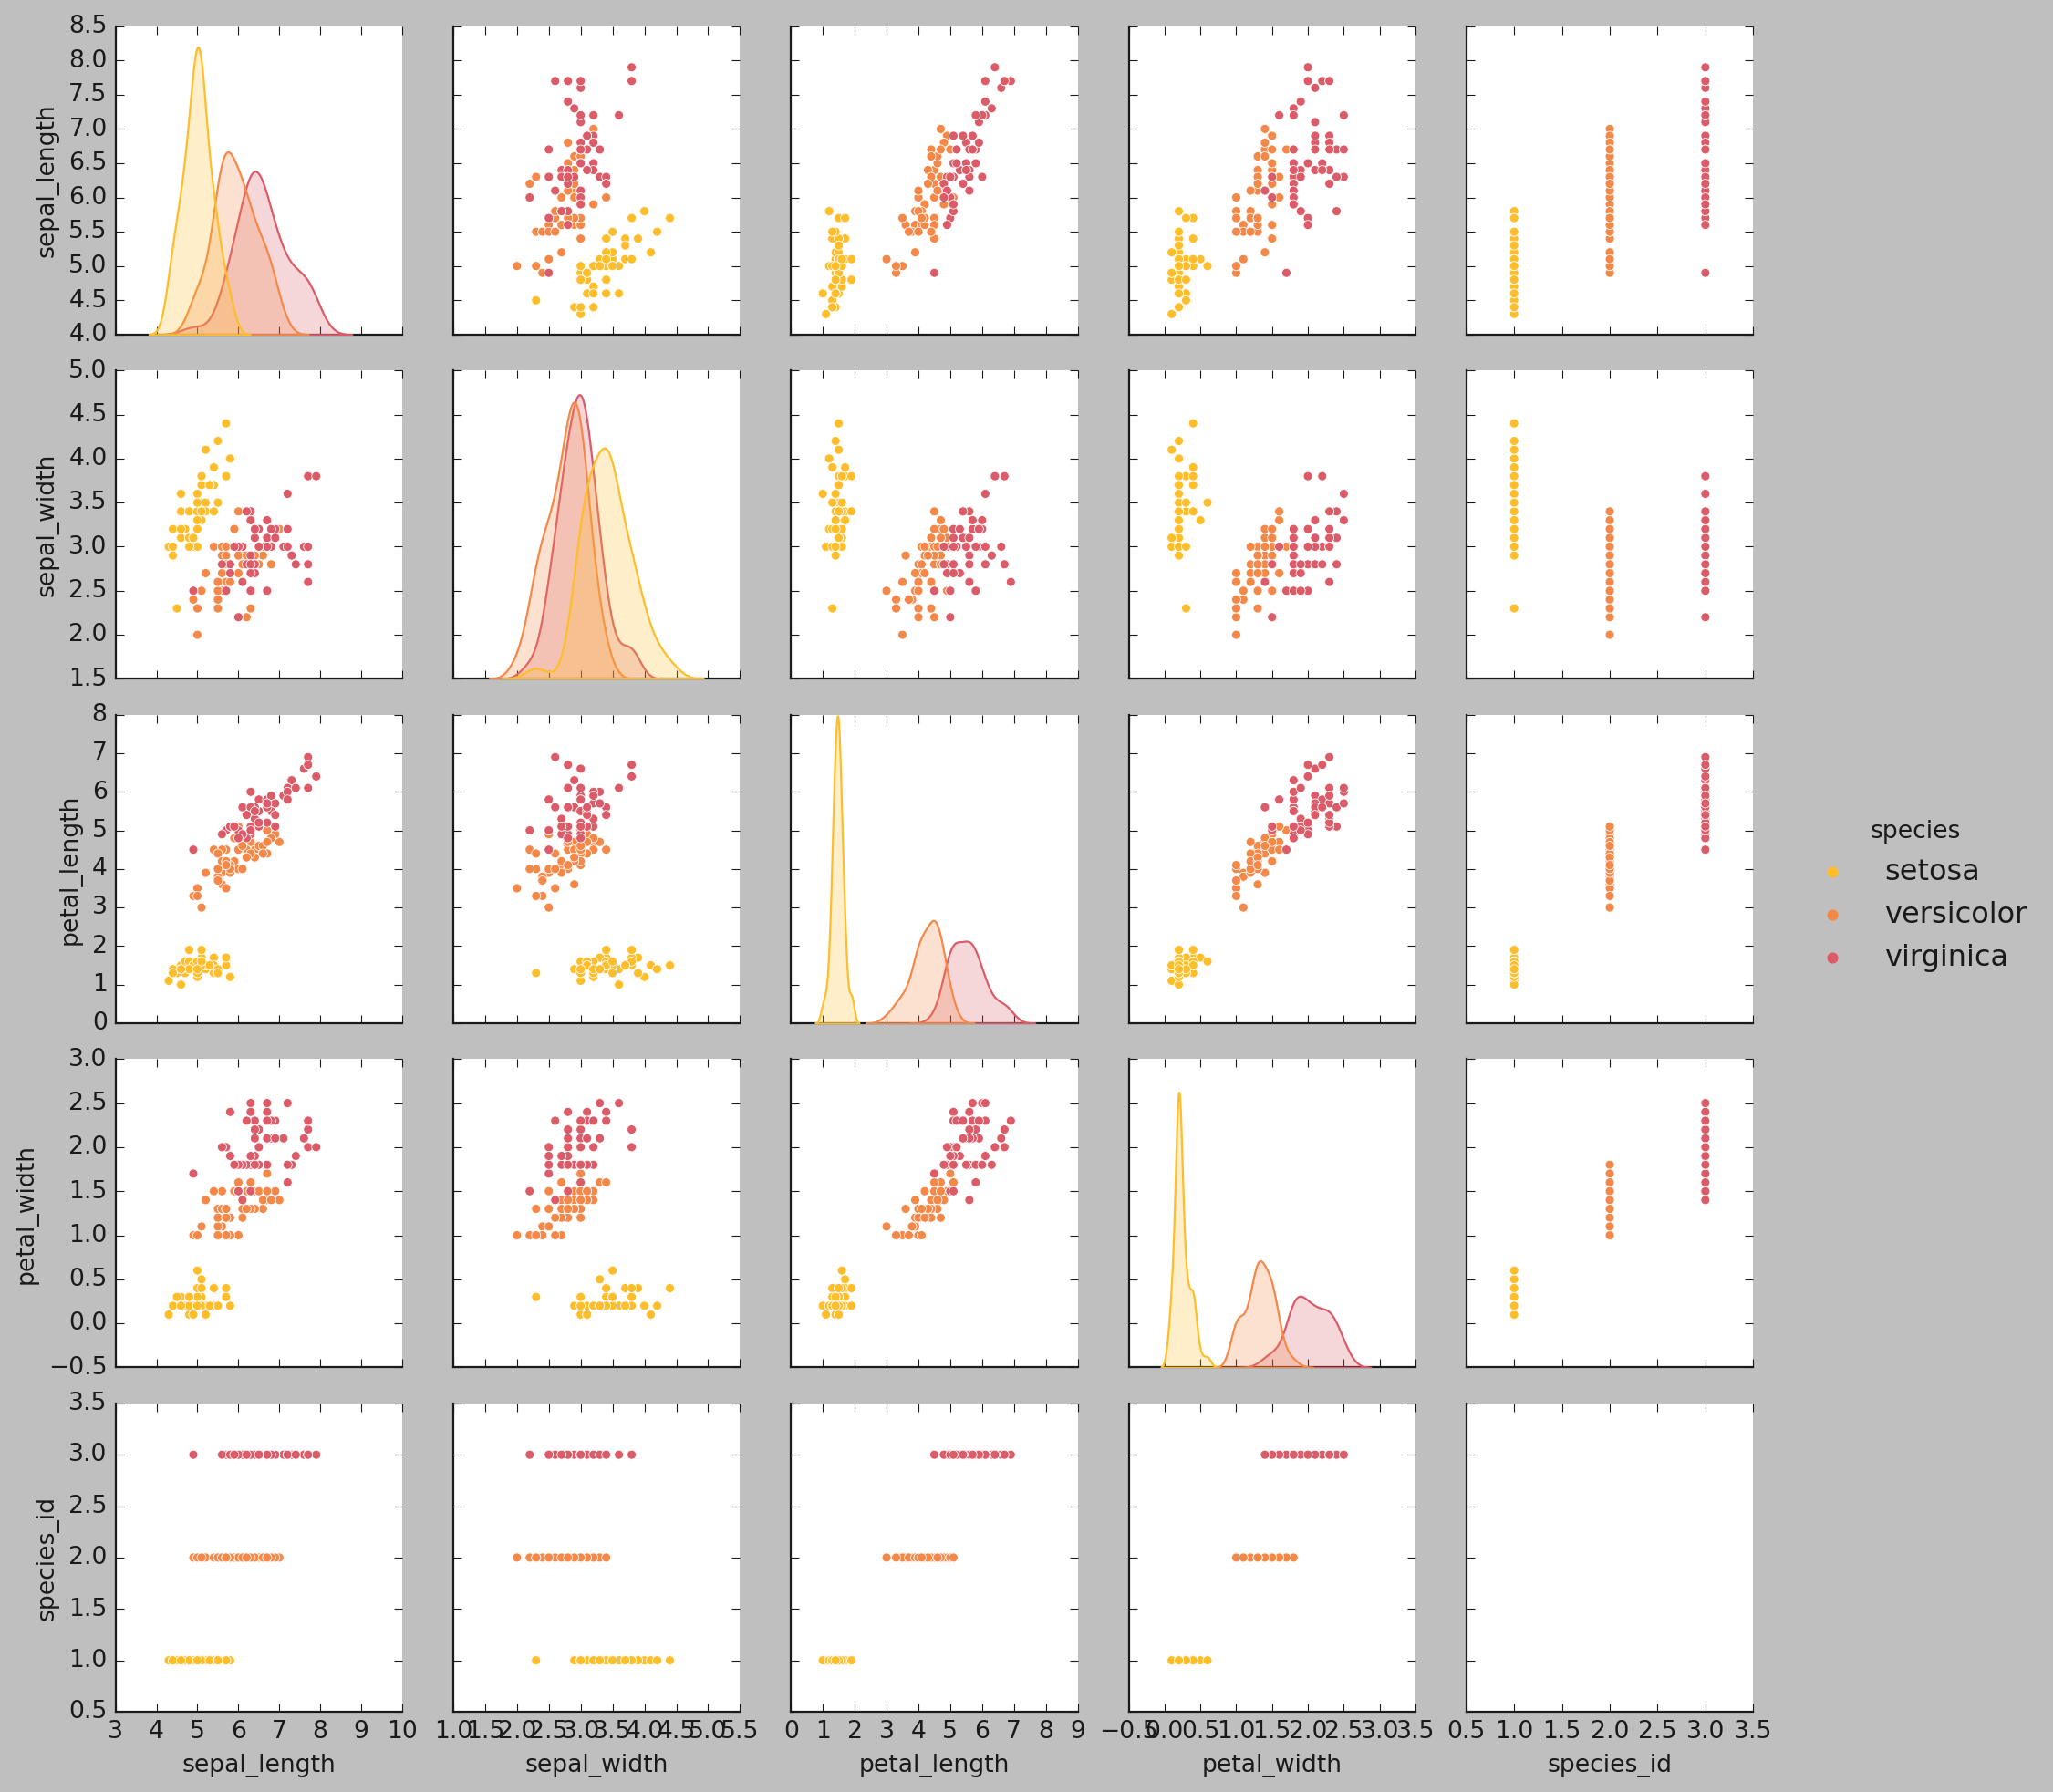

In [145]:
sns.set_palette('plasma_r')
sns.pairplot(iris[cols])
plt.show()
sns.pairplot(iris, hue='species')
plt.show()

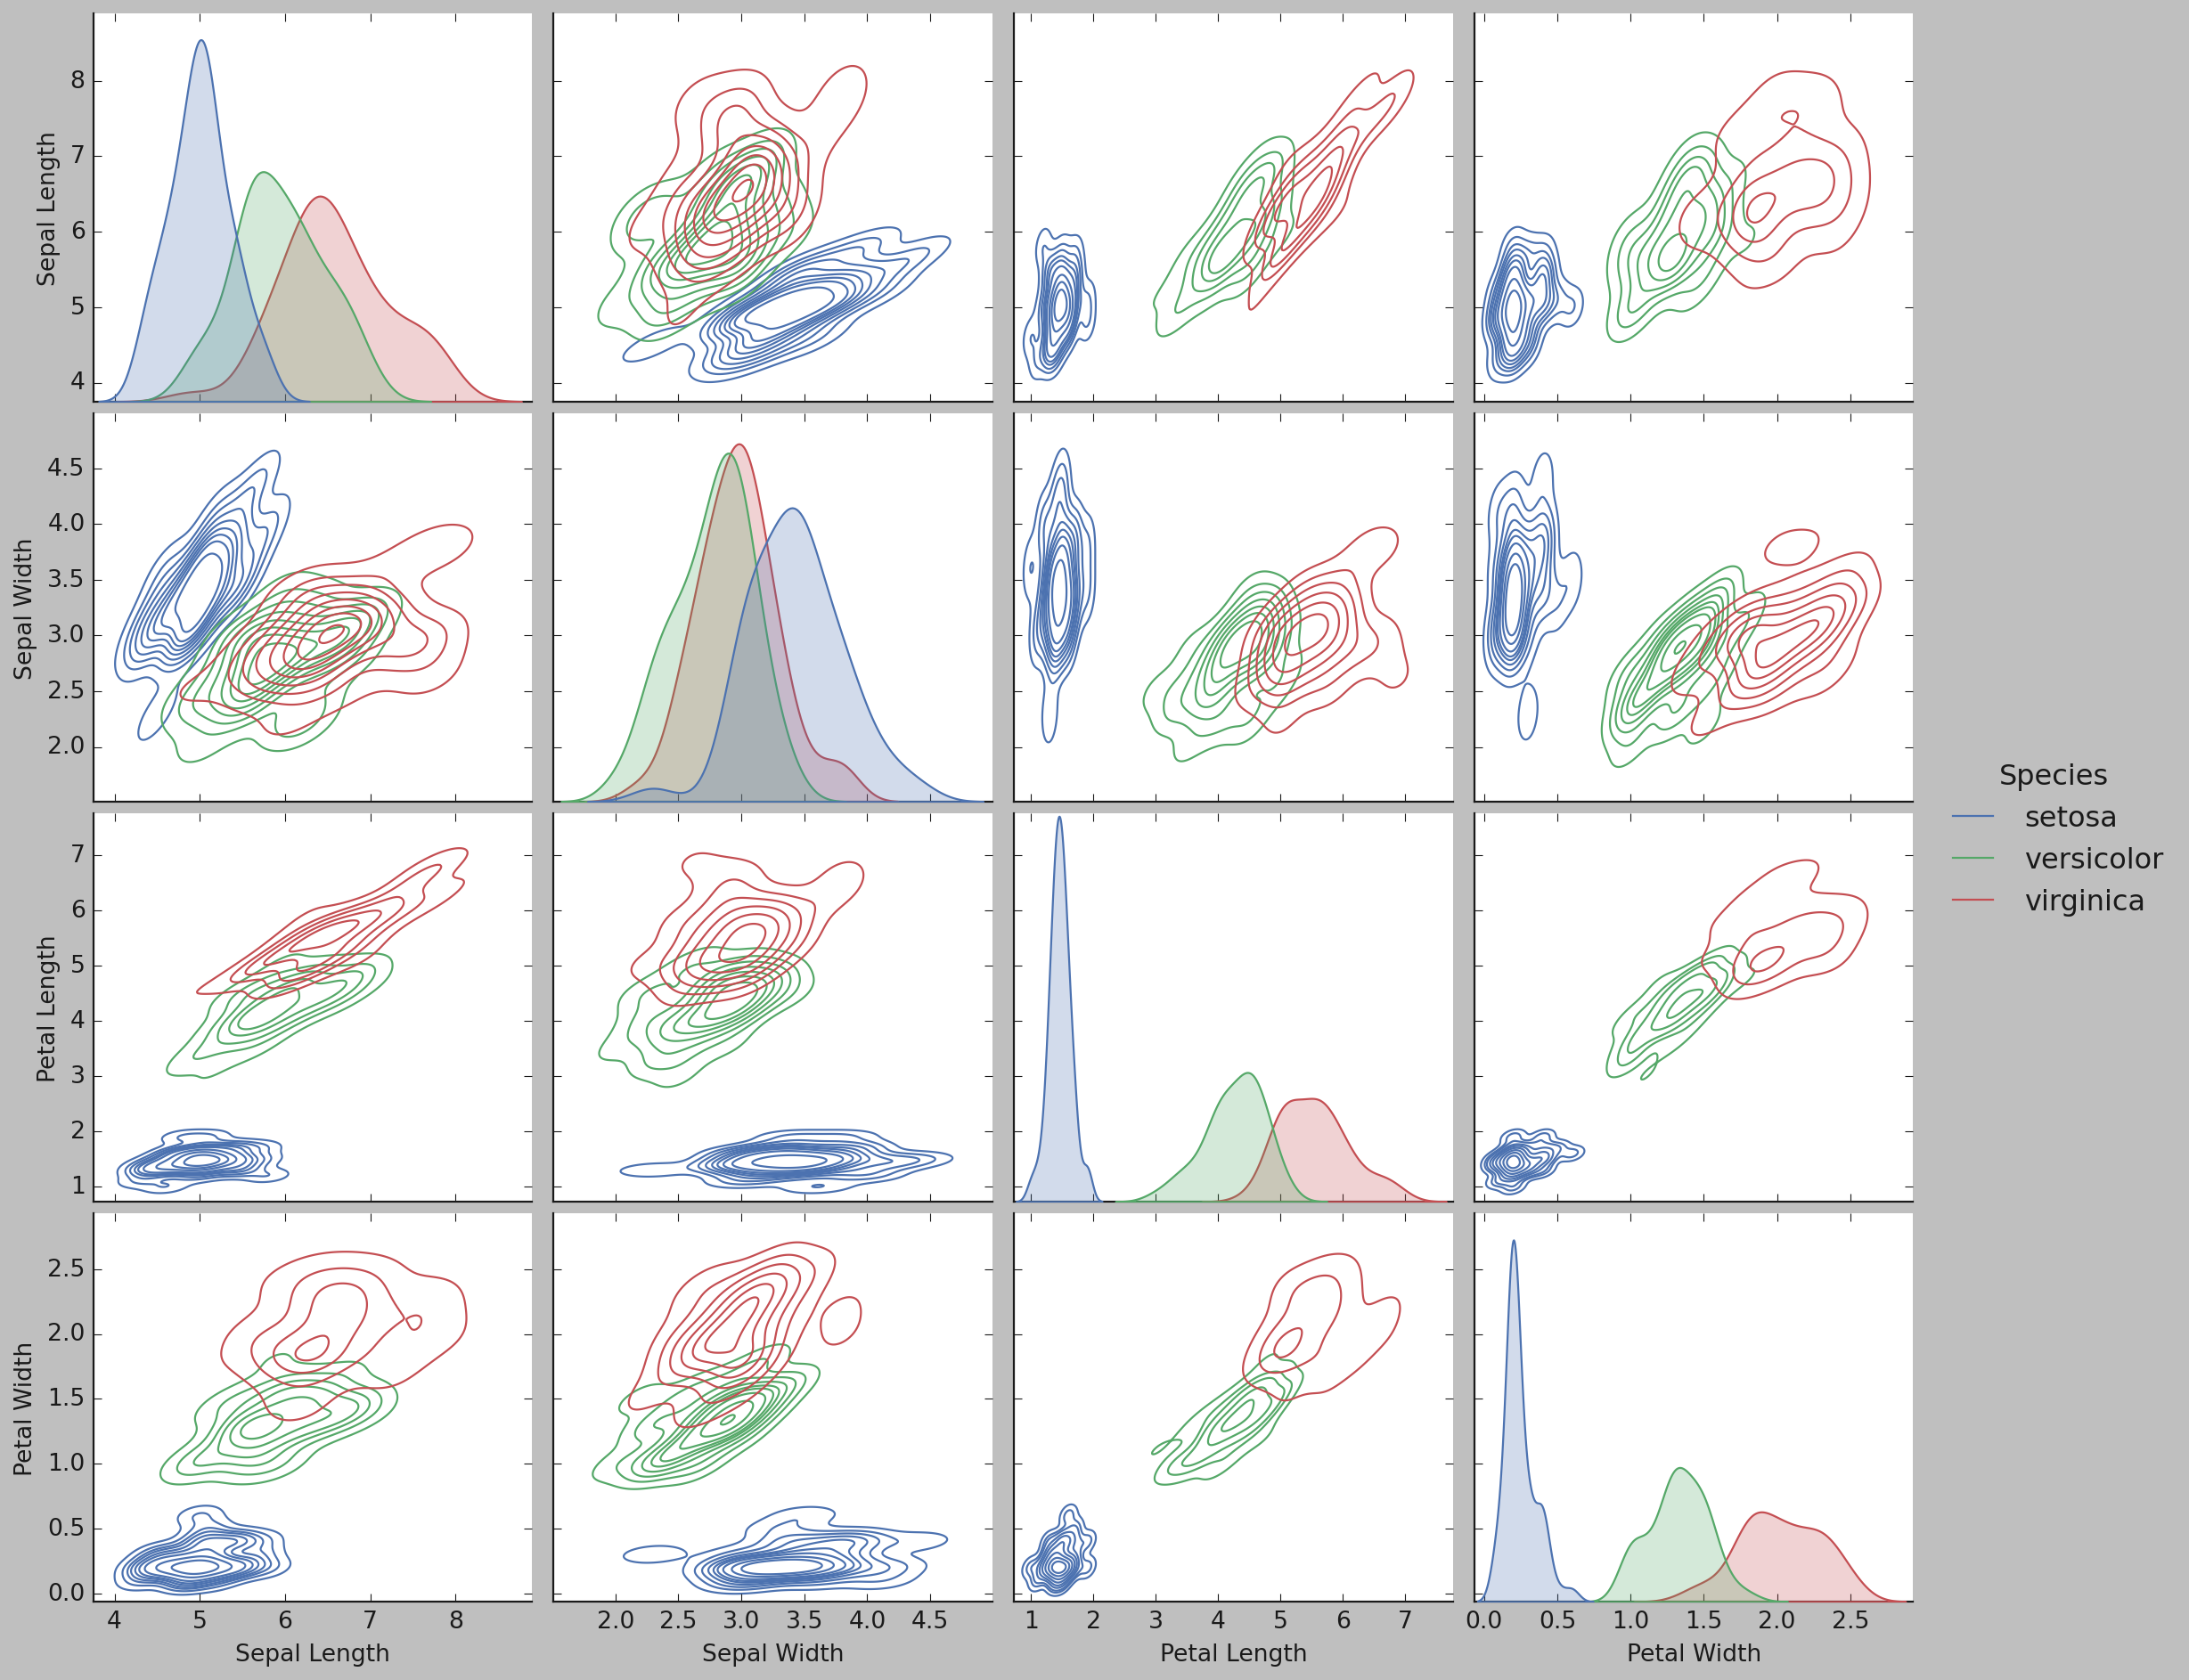

In [229]:
sns.pairplot(iris2, kind='kde', hue='Species',height=3 ,aspect=1.15)
plt.show()

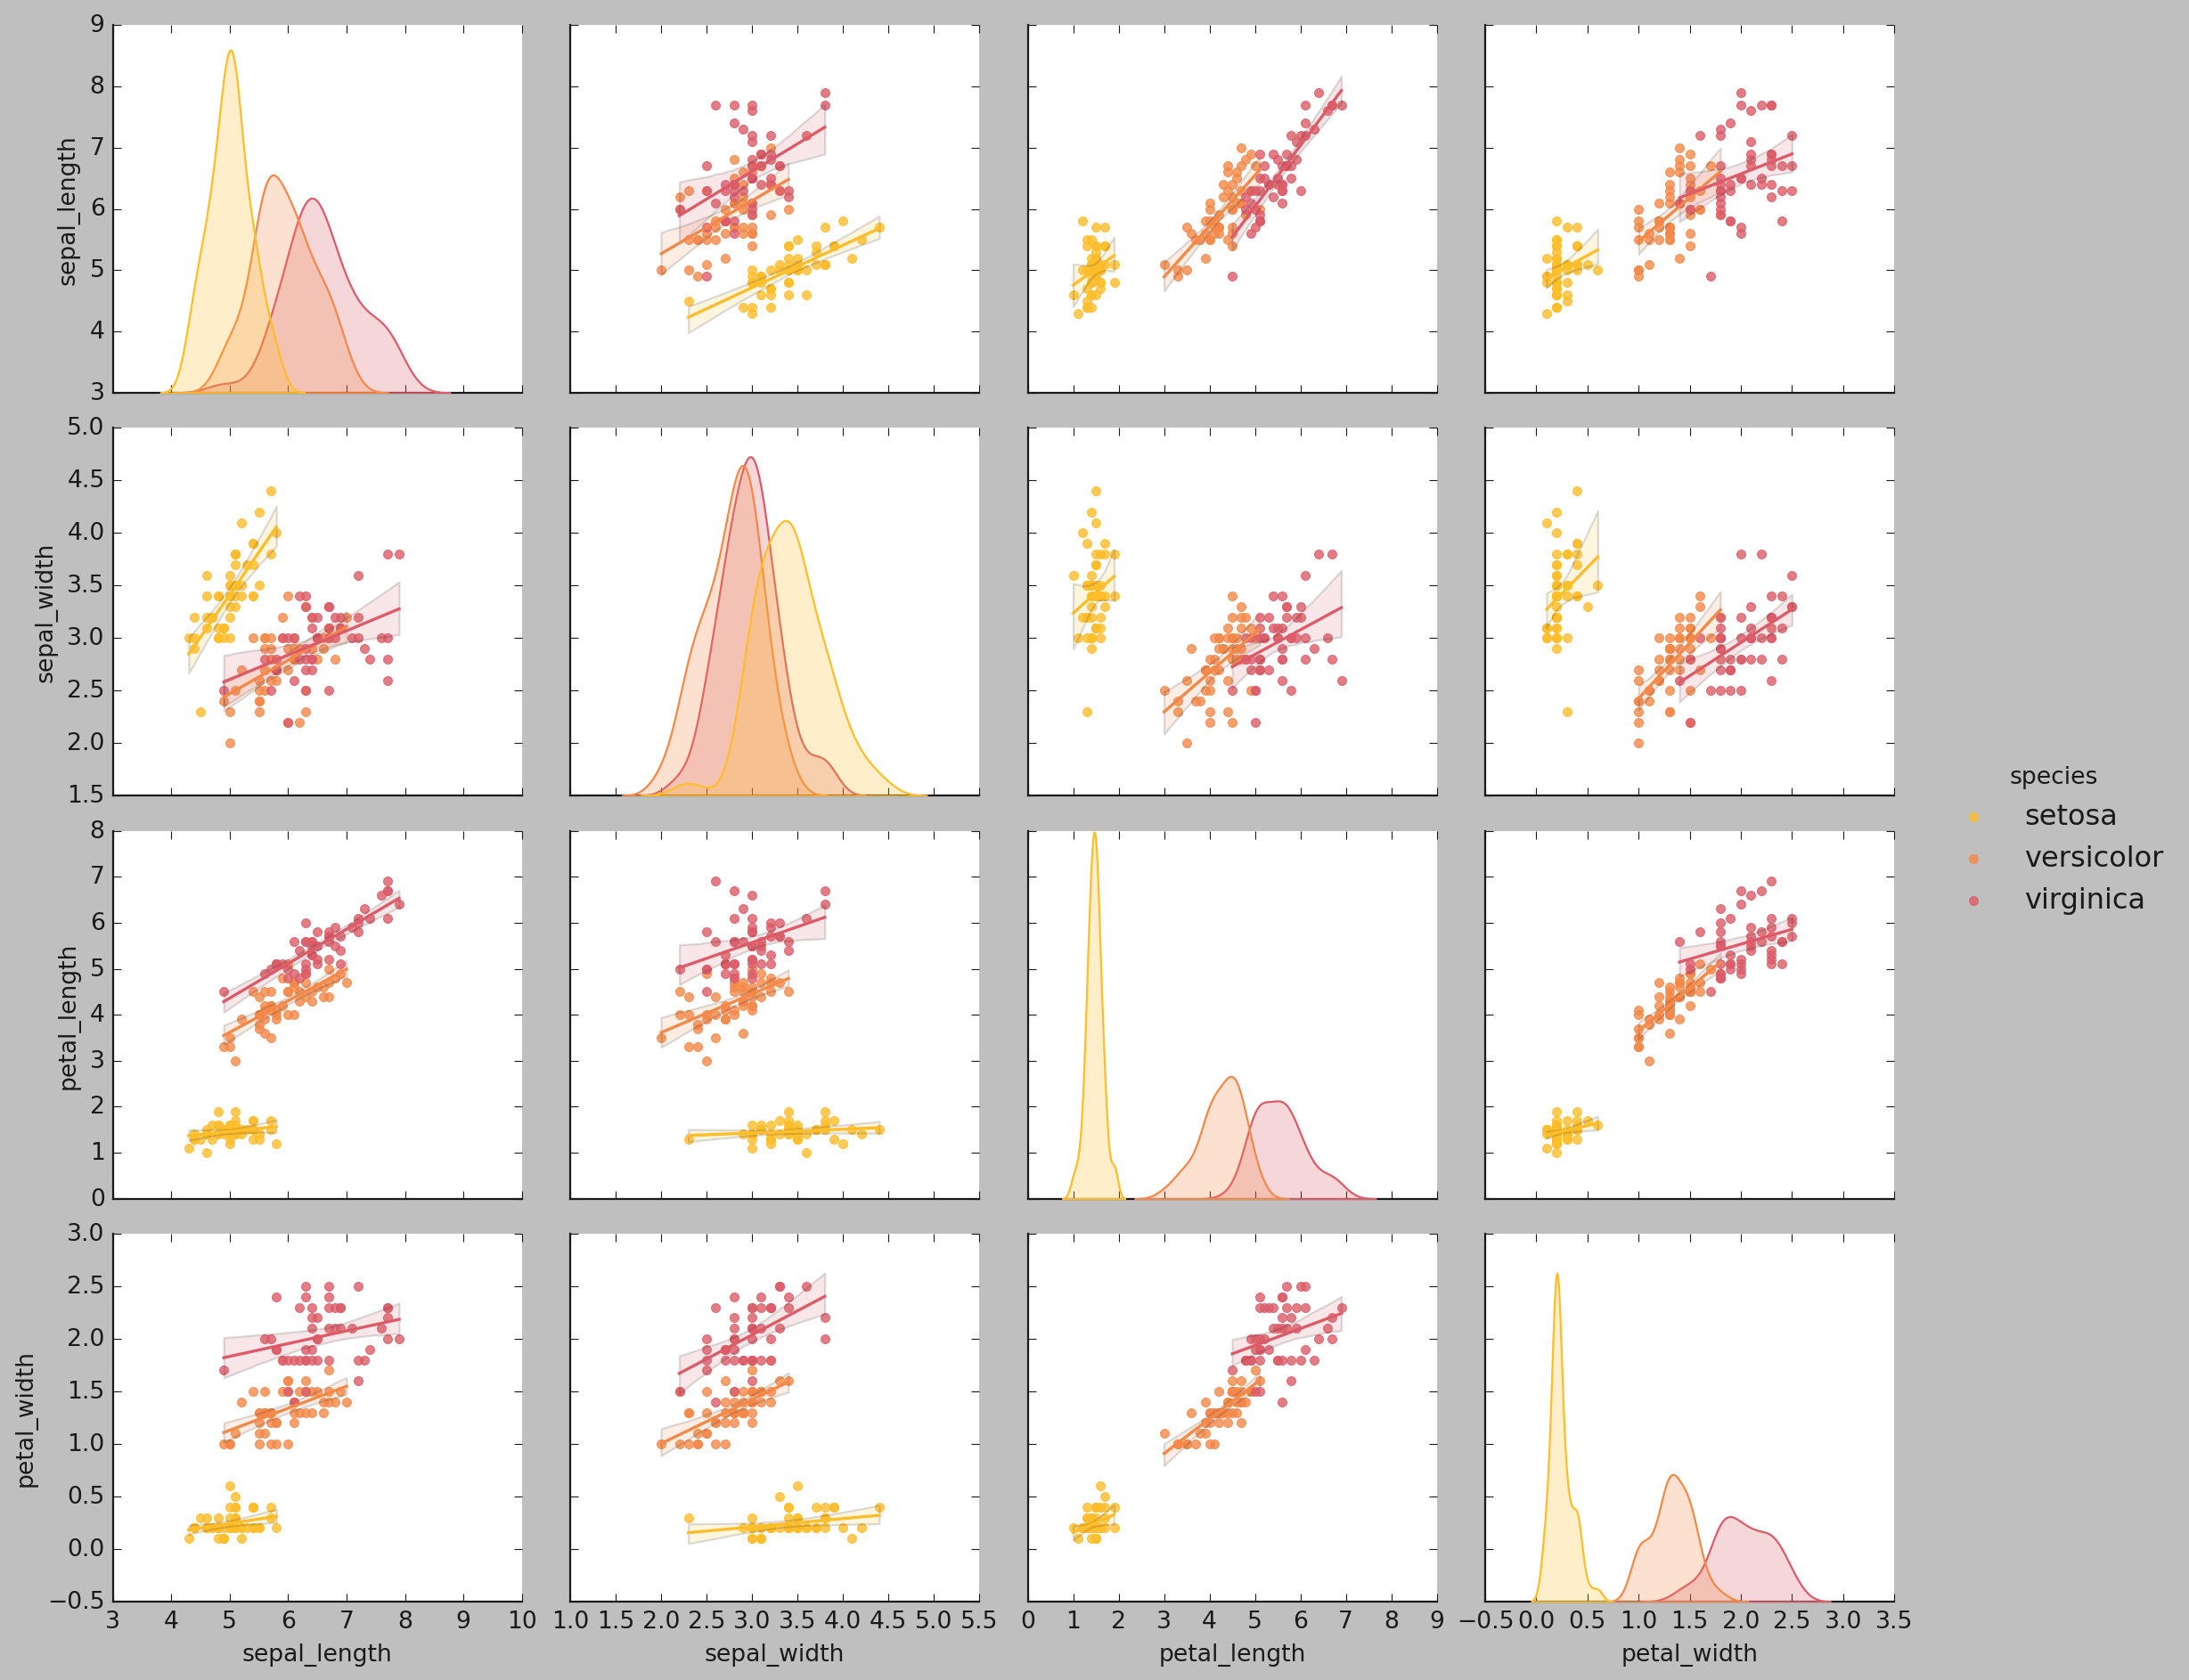

In [153]:

sns.pairplot(iris[iris.columns[:-1]],kind='reg', hue='species',height=3 ,aspect=1.15)
plt.xticks(rotation=90)
plt.show()

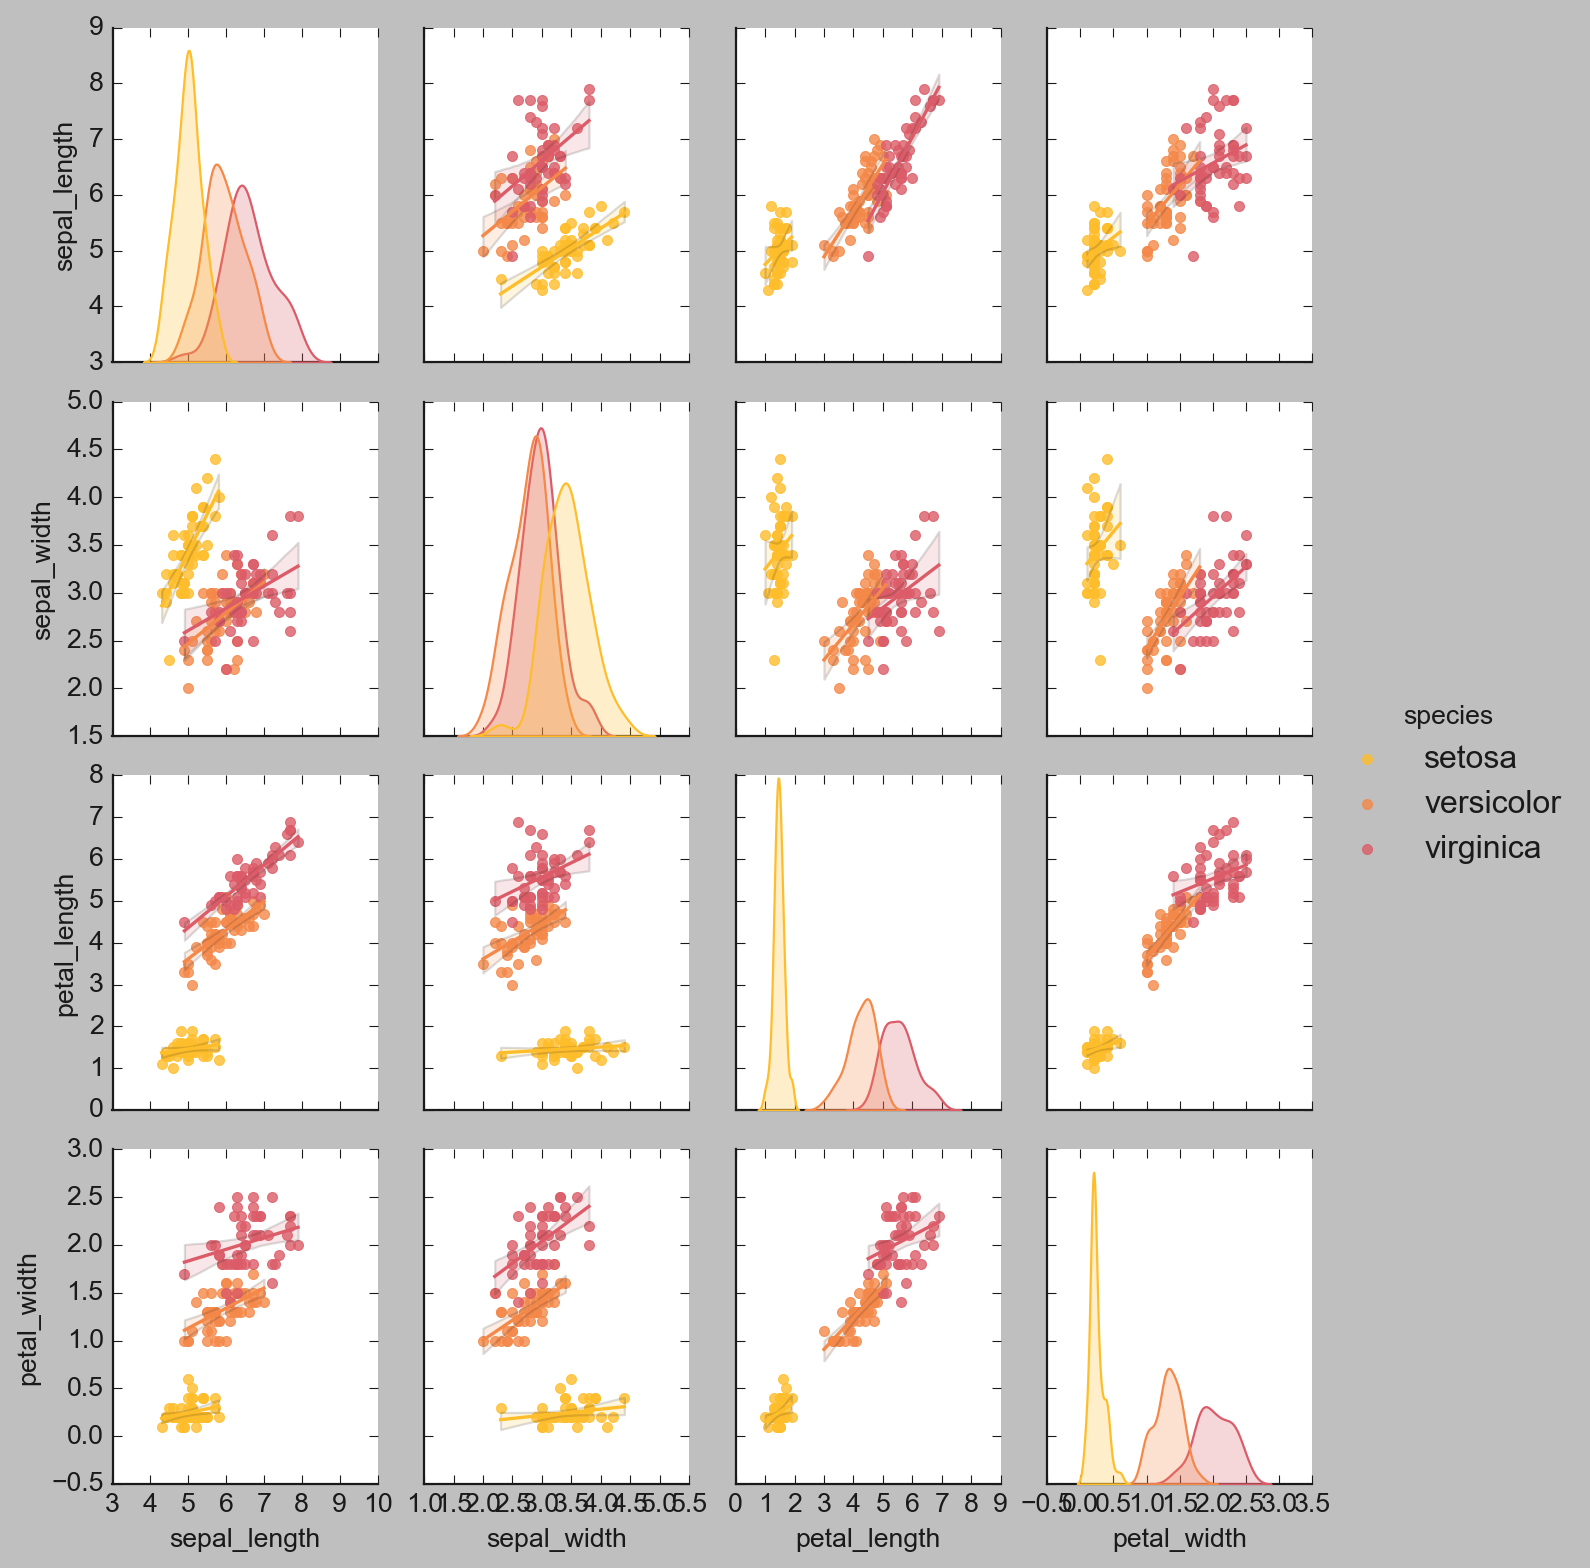

In [202]:
import seaborn as sns

iris = sns.load_dataset("iris")

pairplot = sns.pairplot(iris, kind='reg', hue='species')

sns.set(font_scale=1.2)
pairplot.fig.set_size_inches(10, 10)

sns.despine()
plt.show()


In [190]:
import itertools
axes = [(ax_y, ax_x) for ax_x, ax_y in zip(range(4),range(4)[::-1])]
cols = iris.columns[:-1]
axes

[(3, 0), (2, 1), (1, 2), (0, 3)]

In [222]:
plt.style.use('classic')

In [ ]:
Lo que hice fue crear una copia del data original, después cambie los nombres de las columnas de la copia del data y use esa data para crear la visualización 

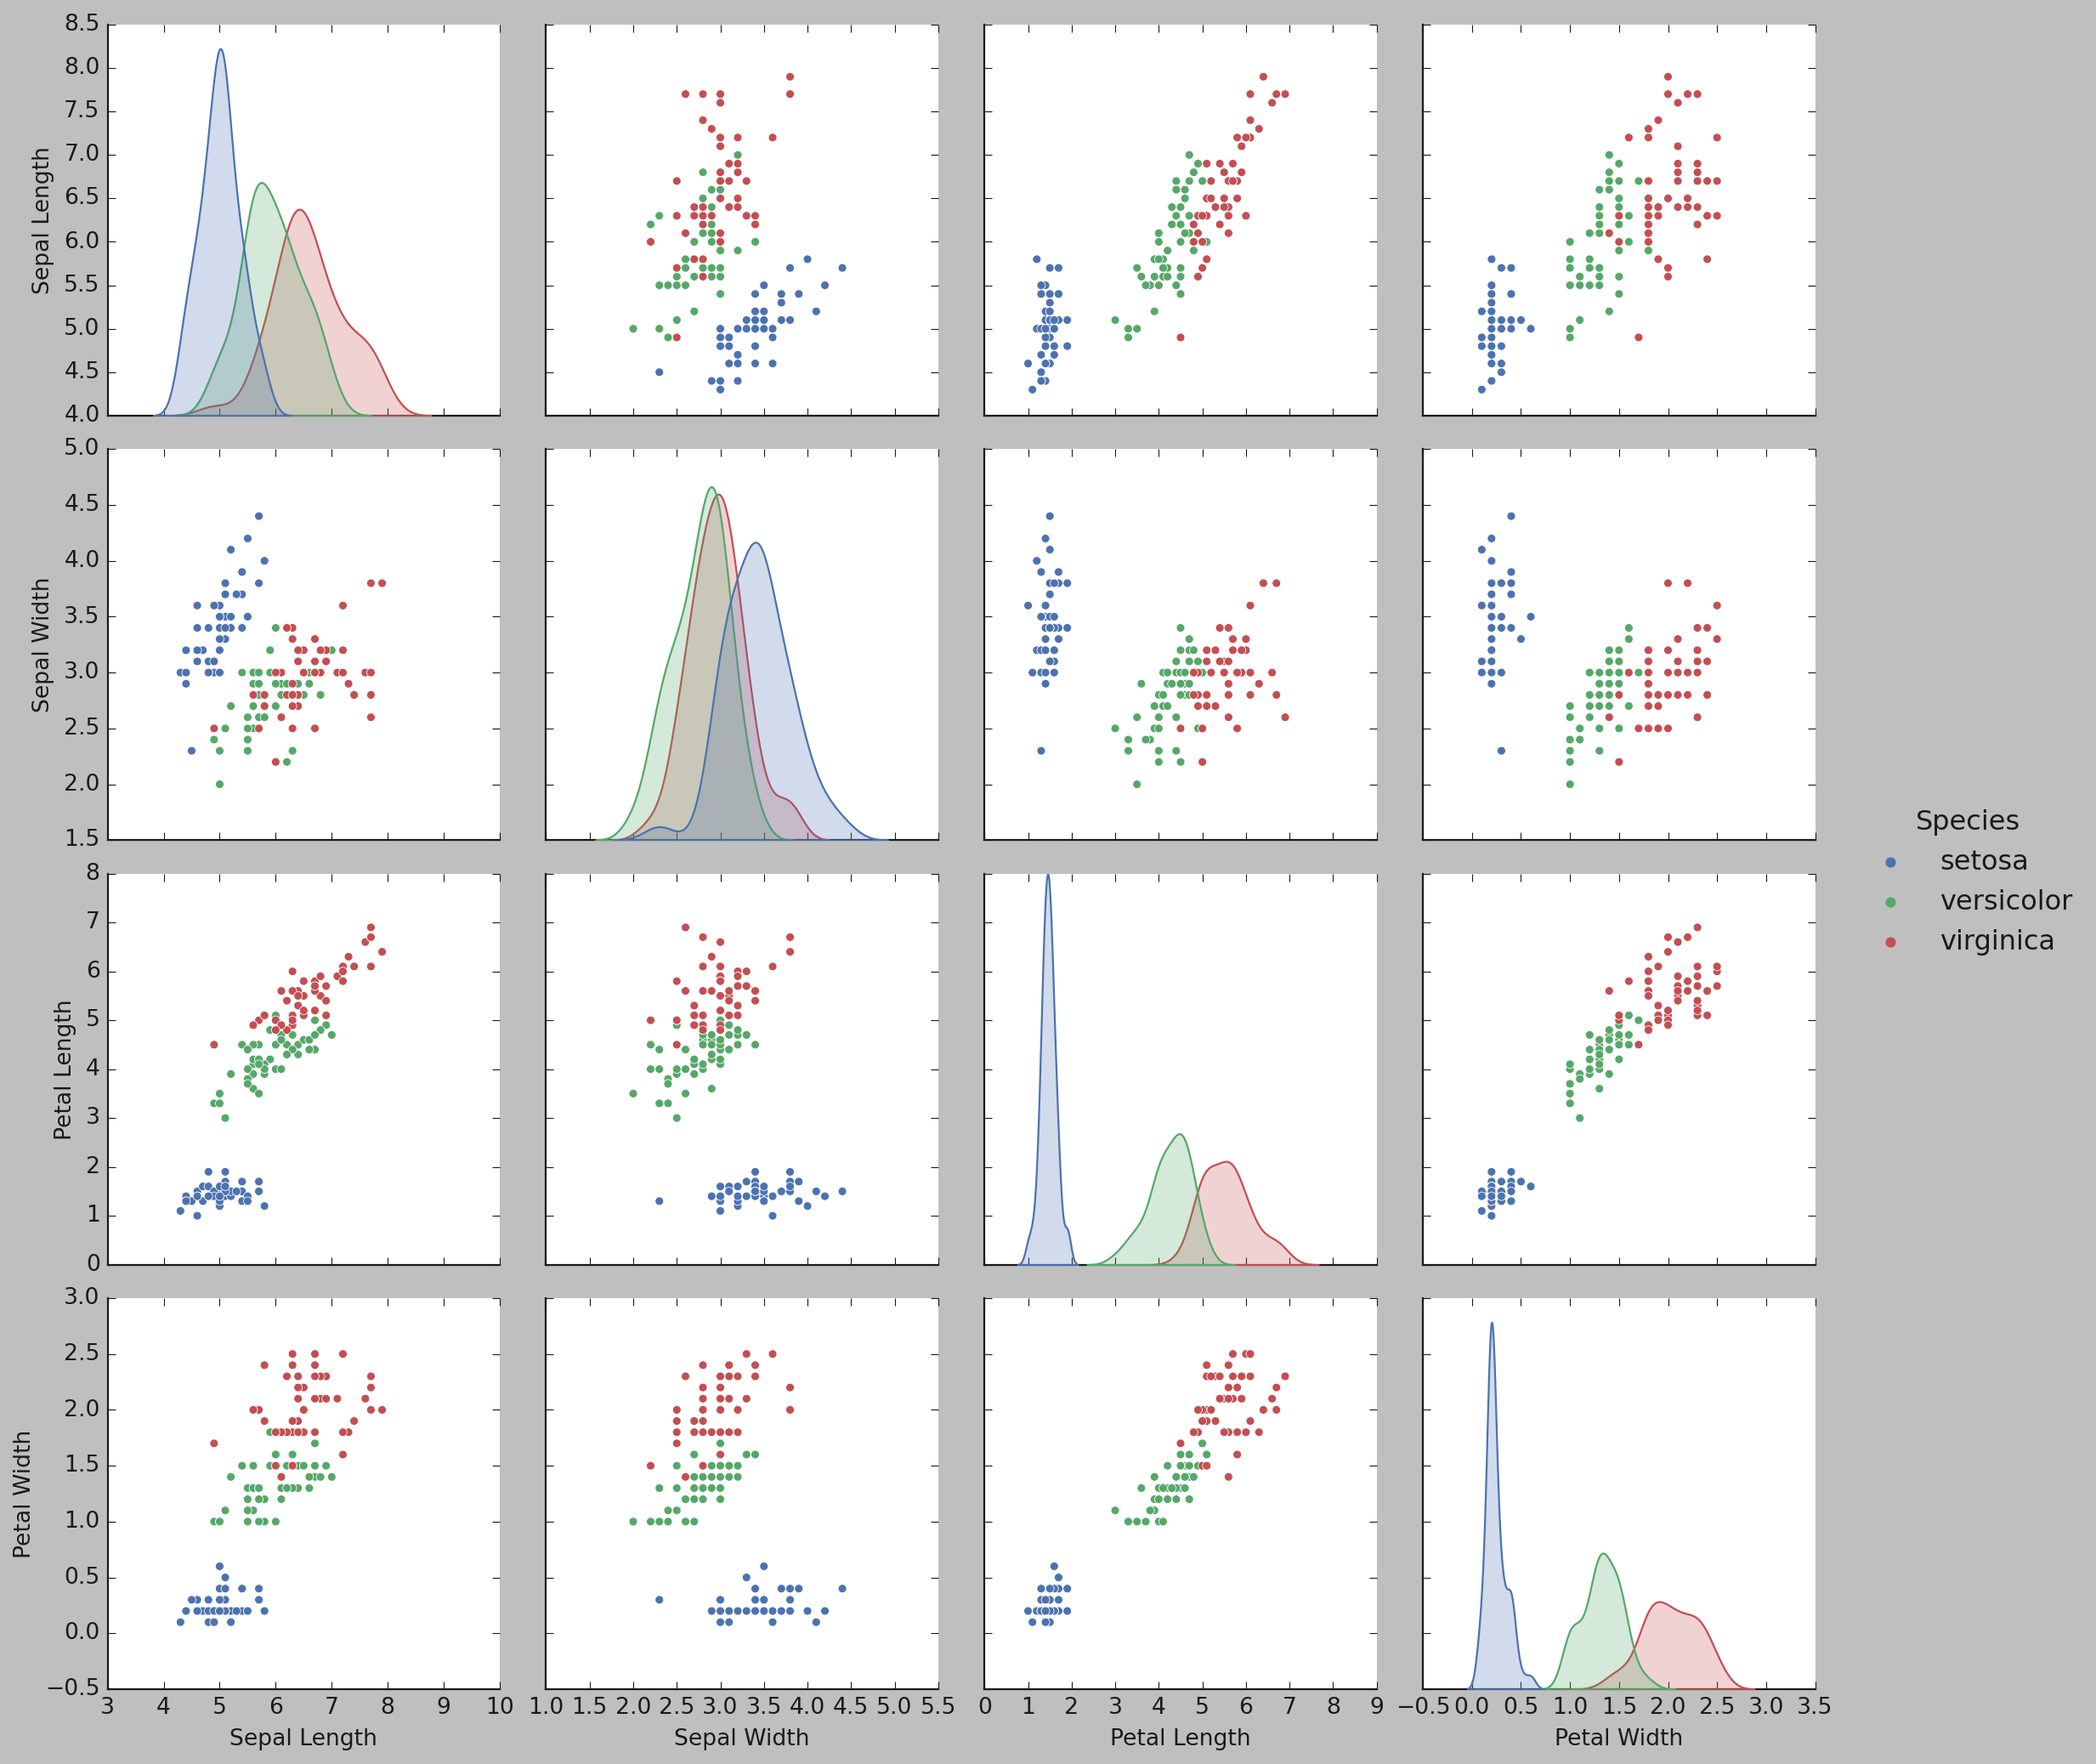

In [224]:
iris2 = iris.copy()
iris2.columns = iris.columns.str.title().str.replace('_',' ')
sns.pairplot(iris2[:-1], hue='Species', height=3.3, aspect=1.05)
plt.show()

## Scatter plot

In [90]:
pairs = [('sepal_length', 'sepal_width'),
 ('sepal_length', 'petal_length'),
 ('sepal_length', 'petal_width'),
 ('sepal_width', 'petal_length'),
 ('sepal_width', 'petal_width'),
 ('petal_length', 'petal_width')]

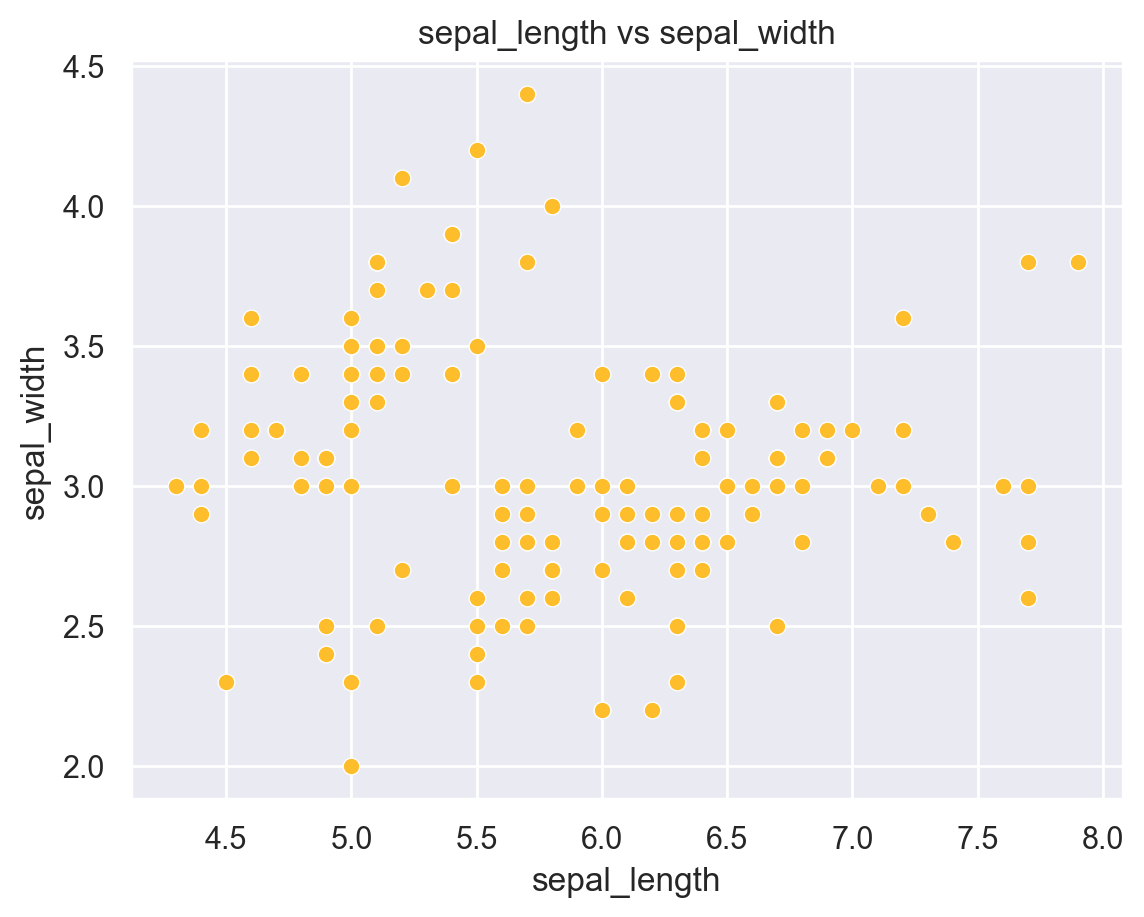

In [100]:
sns.scatterplot(x=iris['sepal_length'], 
                y=iris['sepal_width'])
plt.title(f'{pairs[0][0]} vs {pairs[0][1]}')
plt.show()

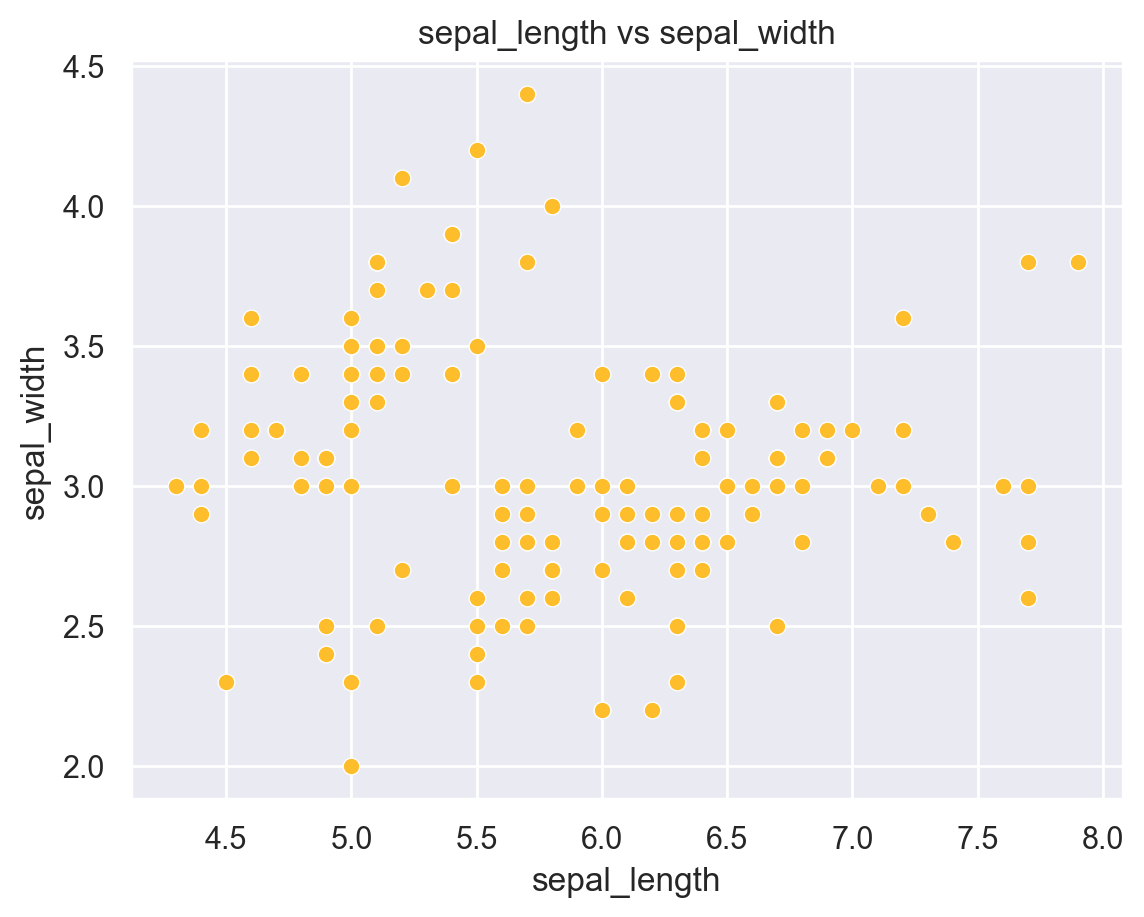

In [101]:
sns.scatterplot(x='sepal_length', y='sepal_width',
               data= iris)
plt.title(f'{pairs[0][0]} vs {pairs[0][1]}')
plt.show()

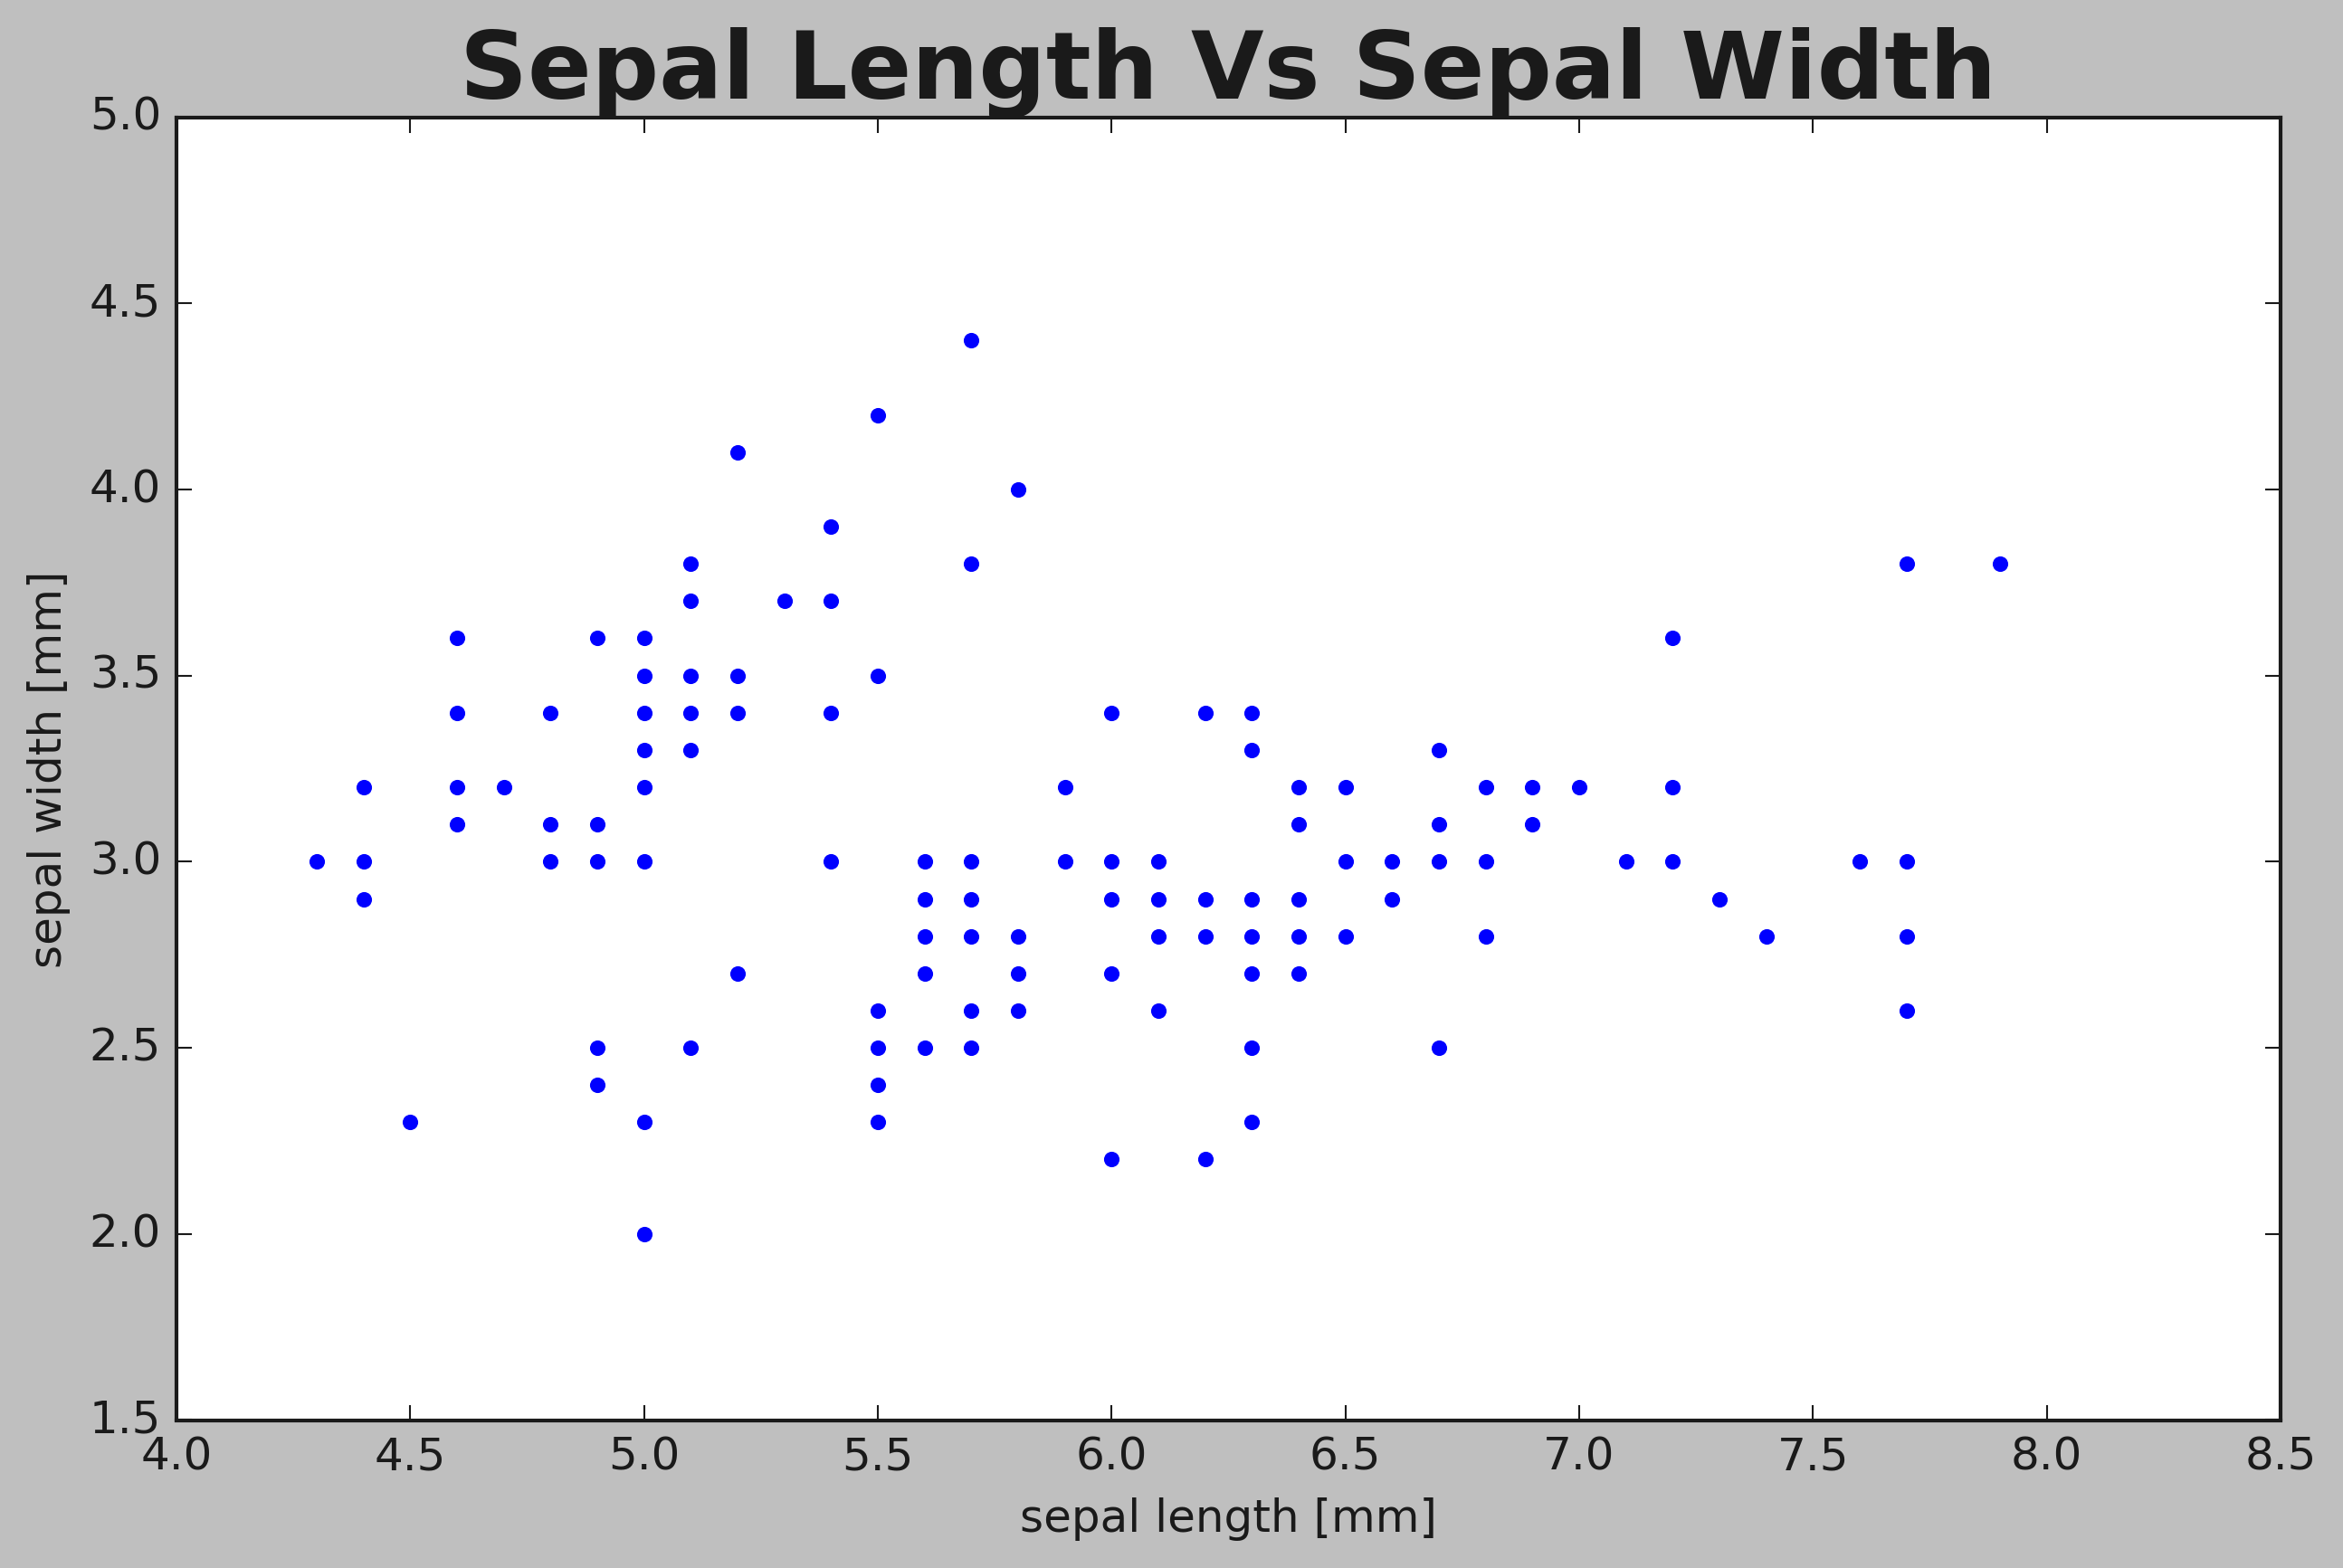

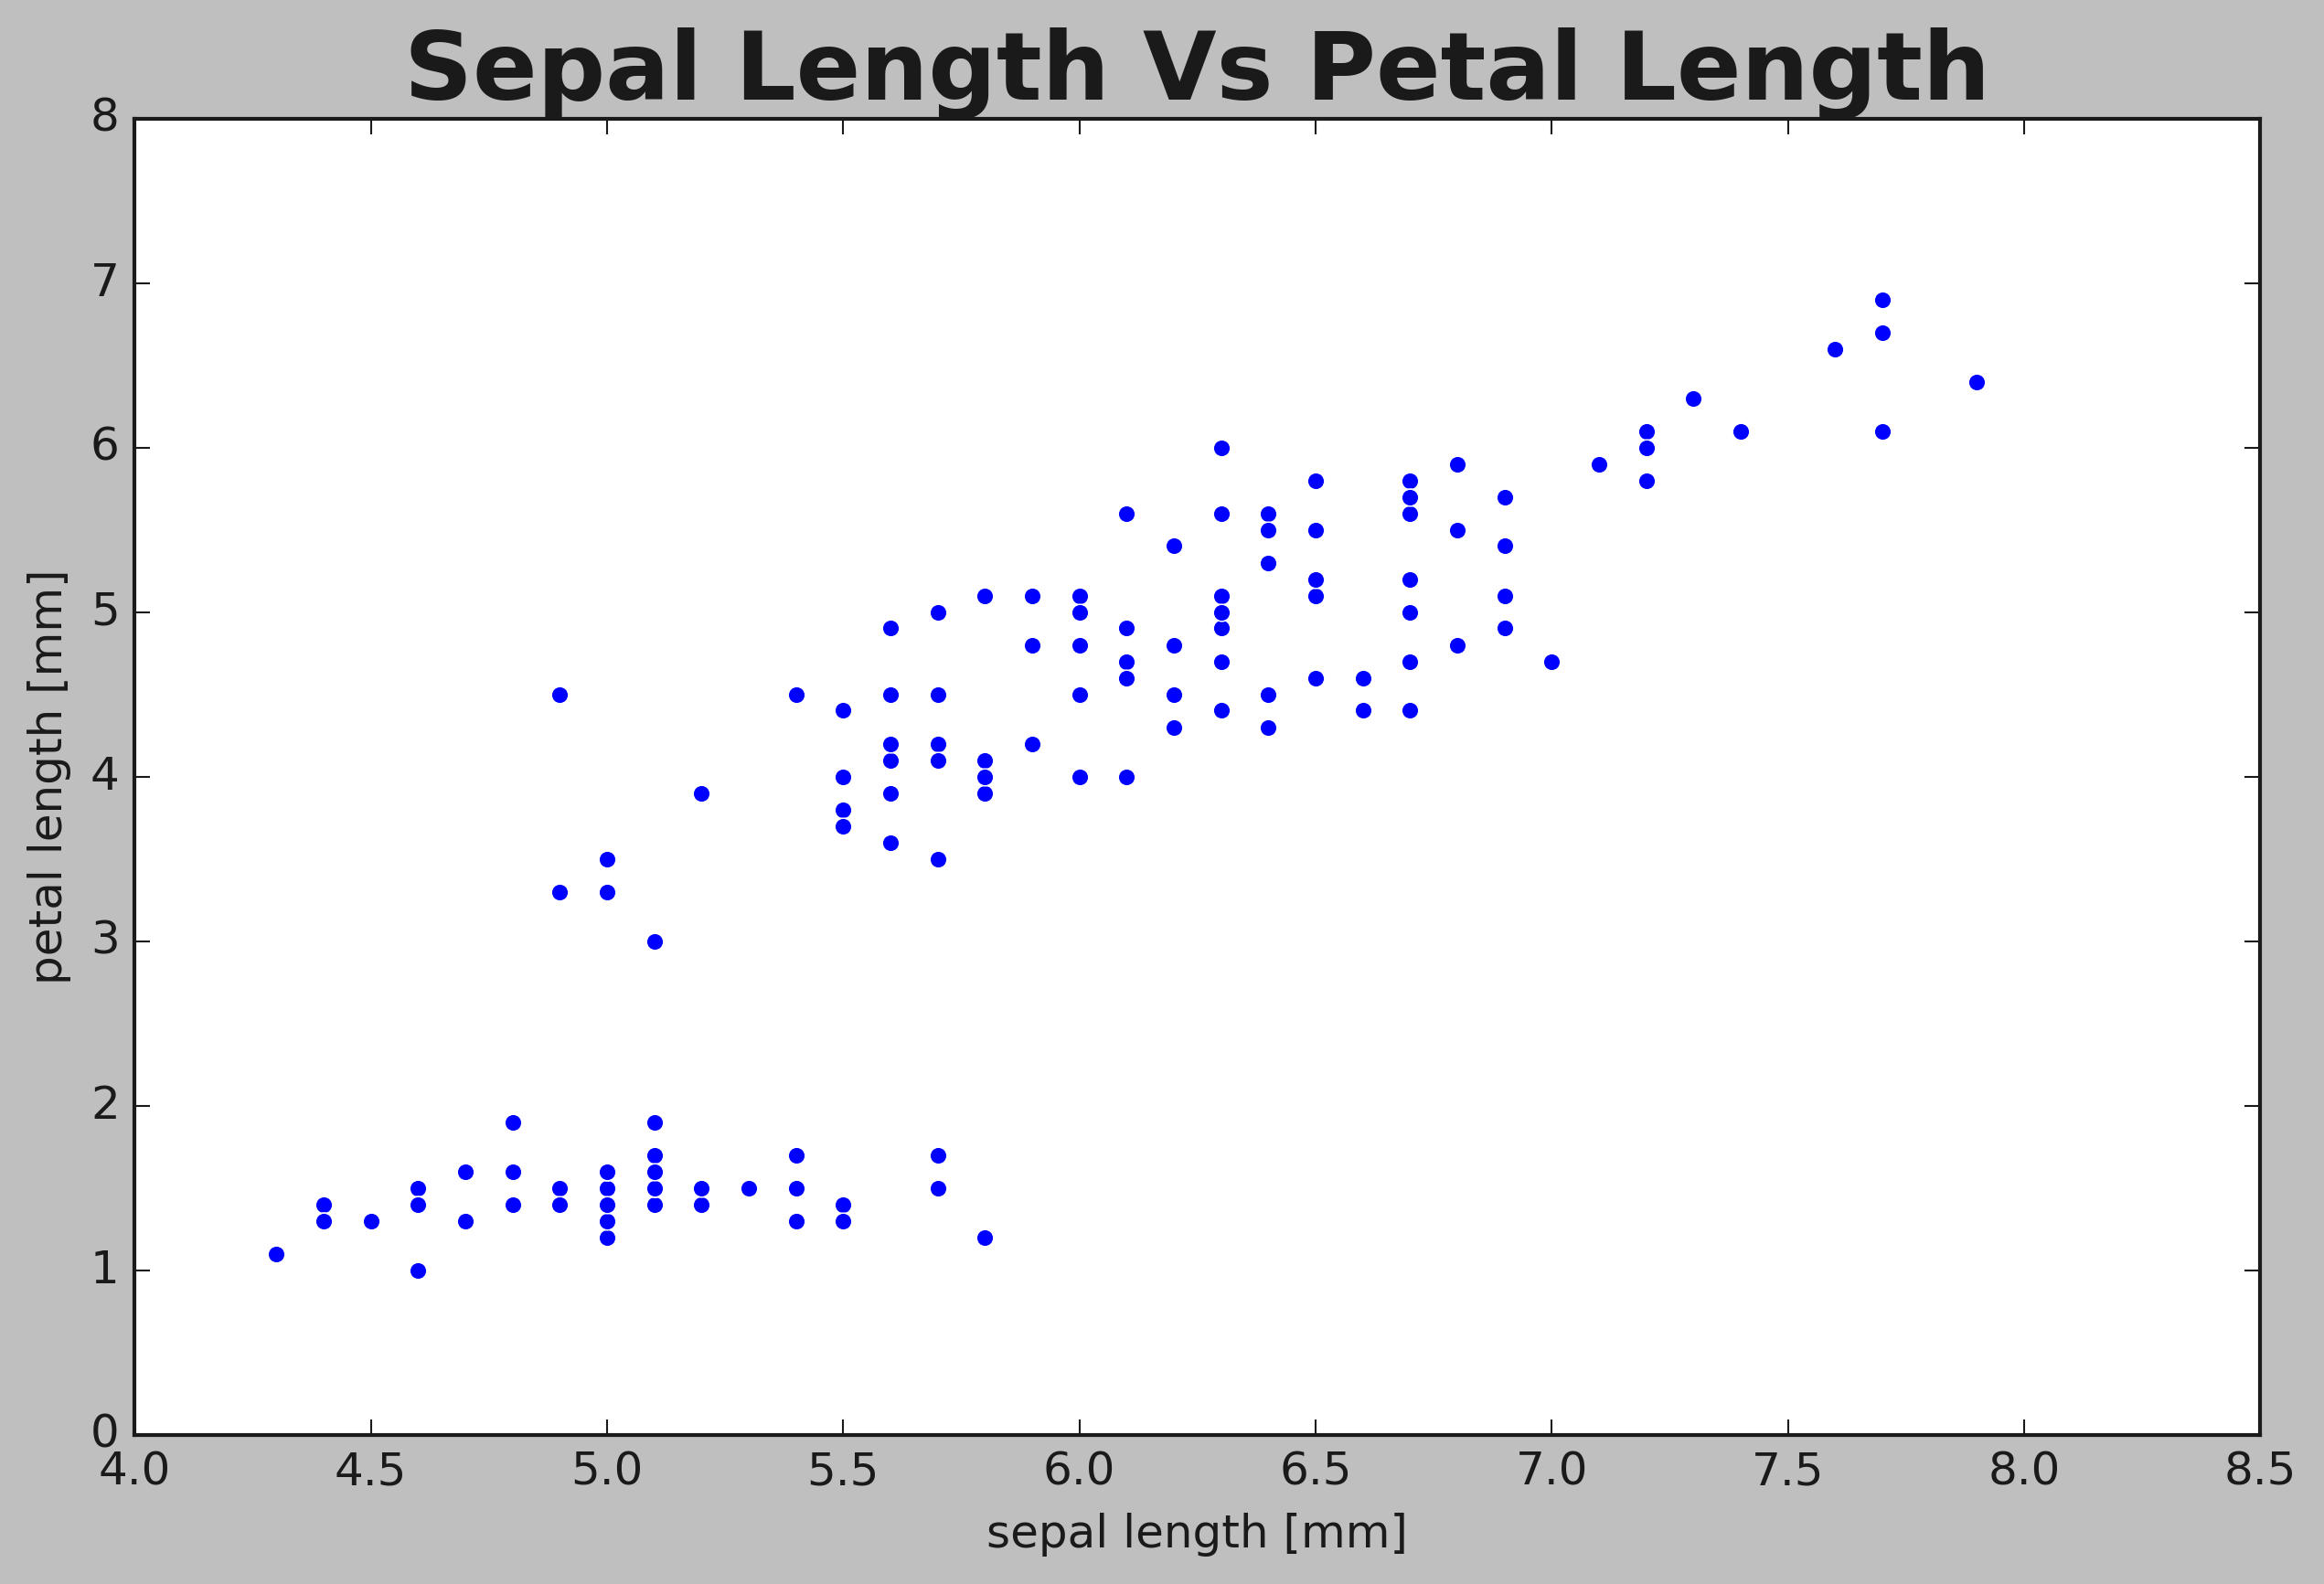

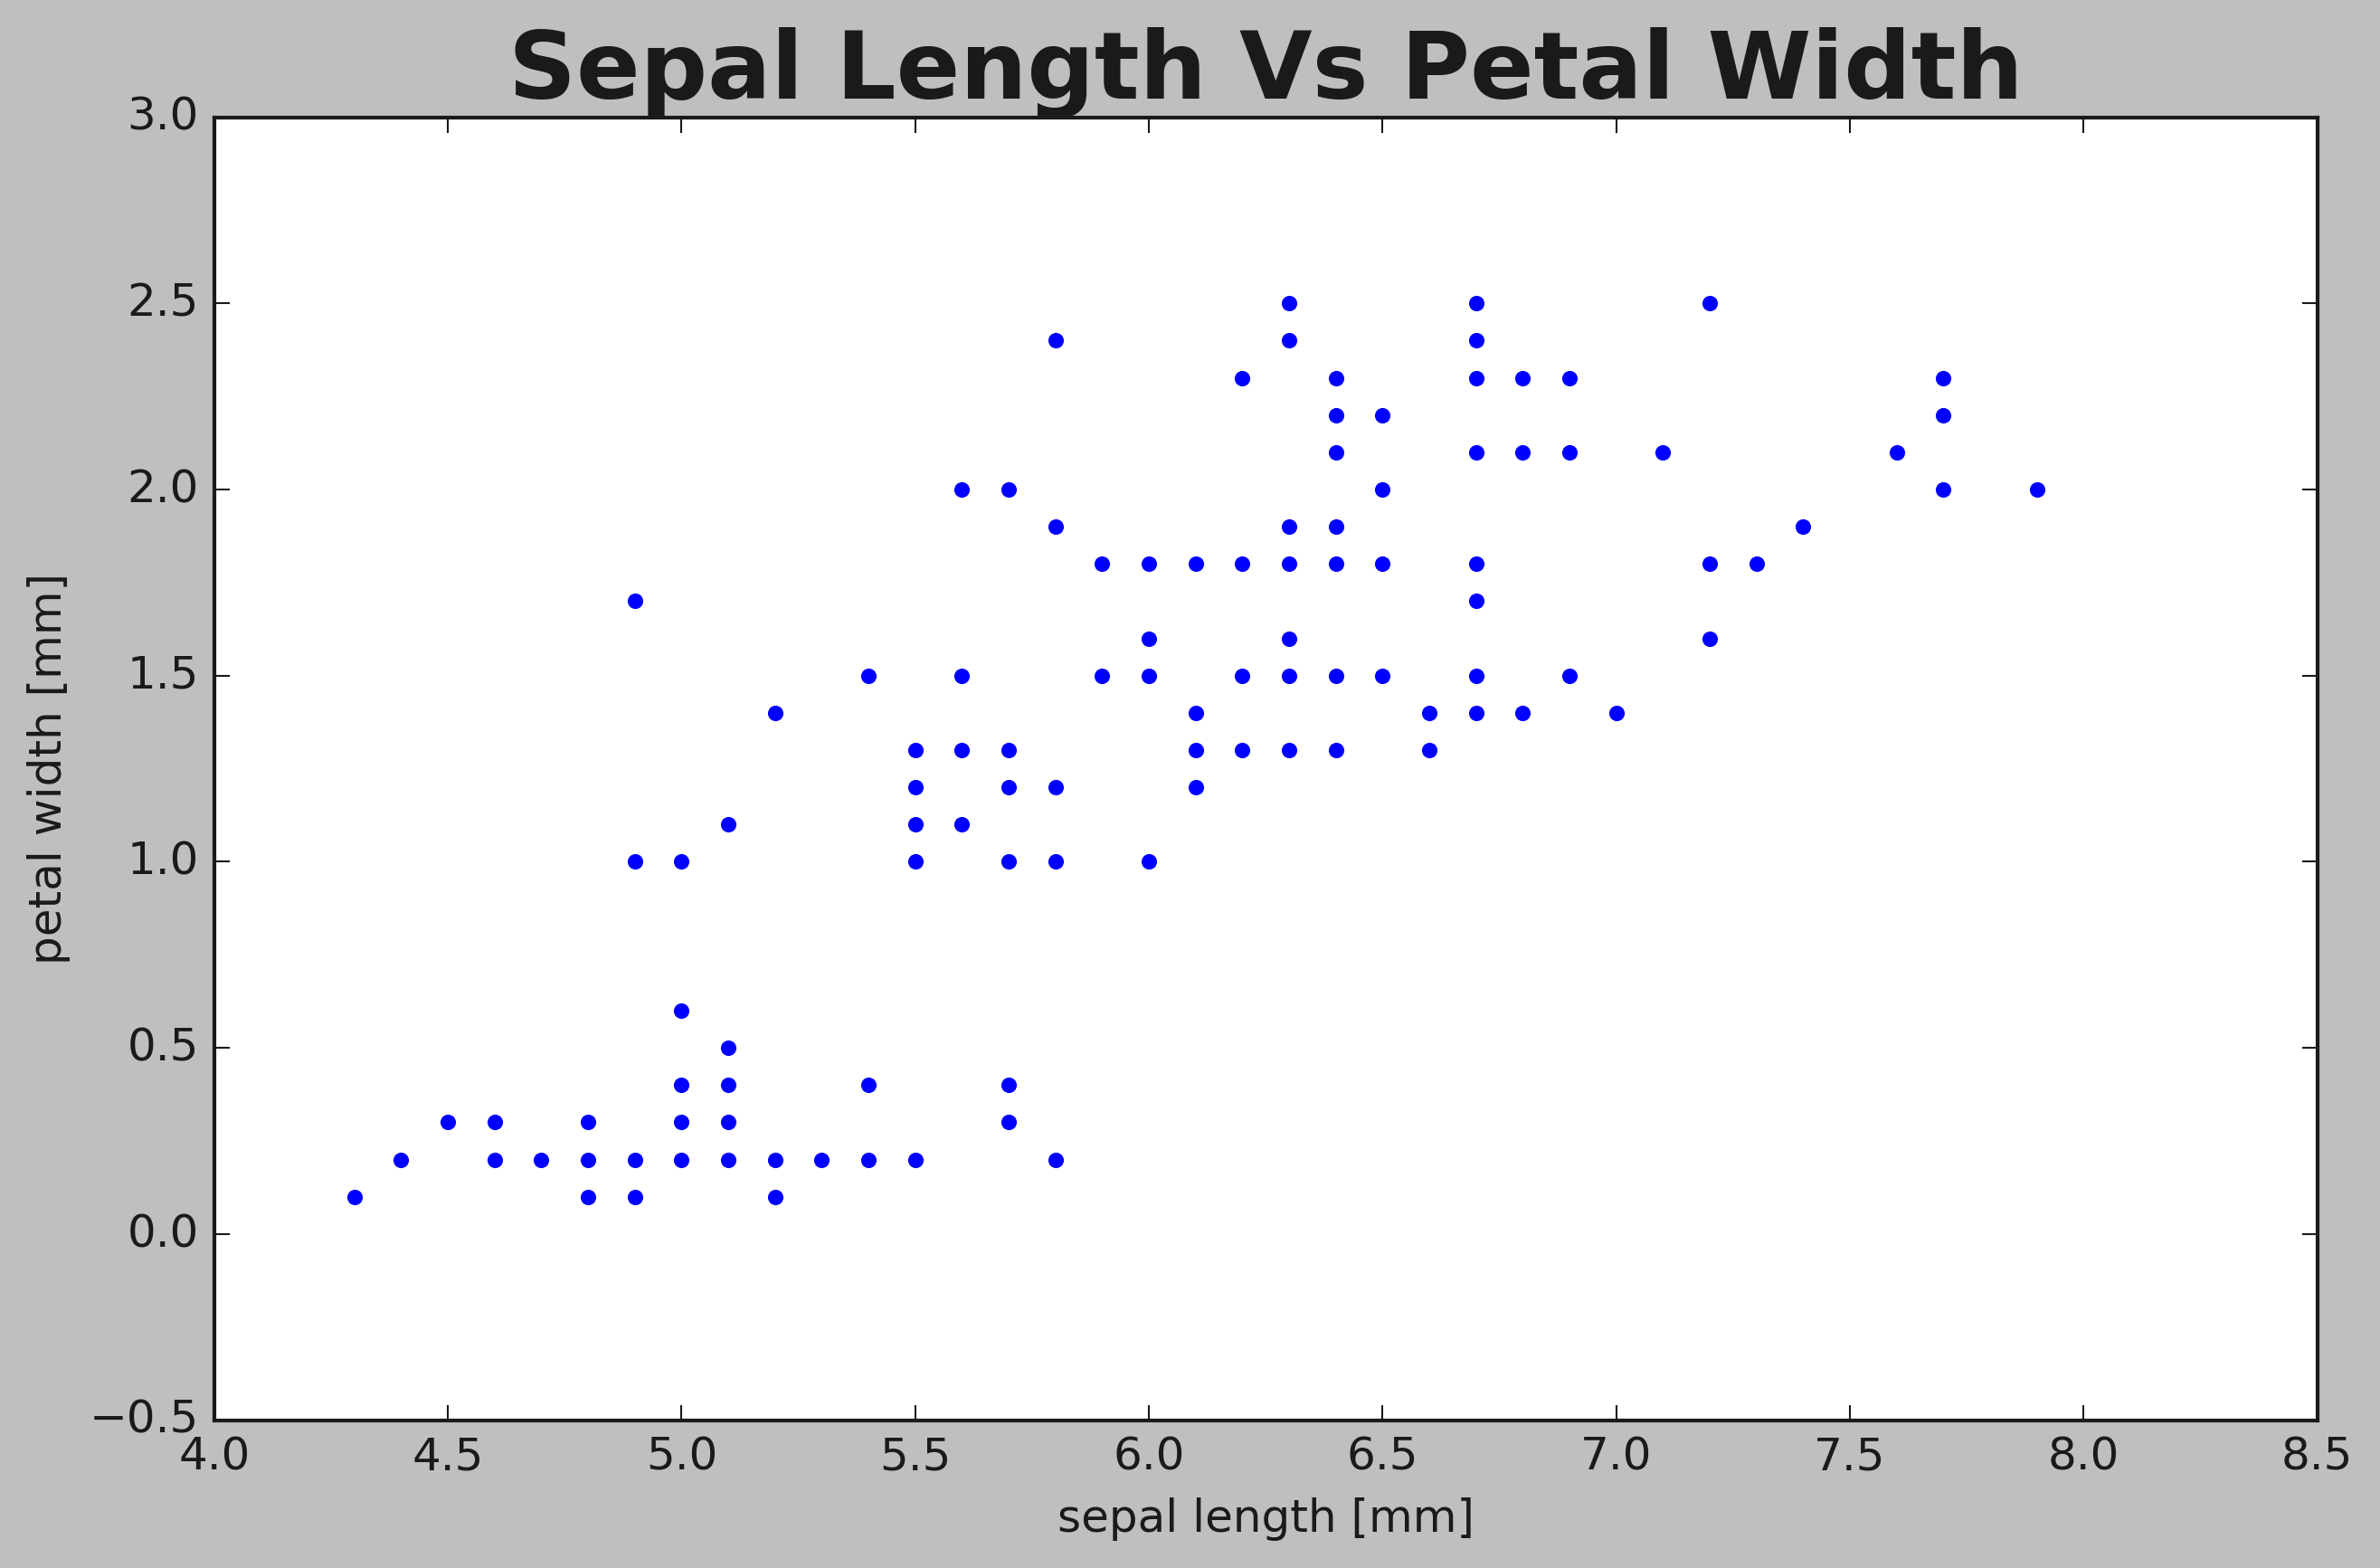

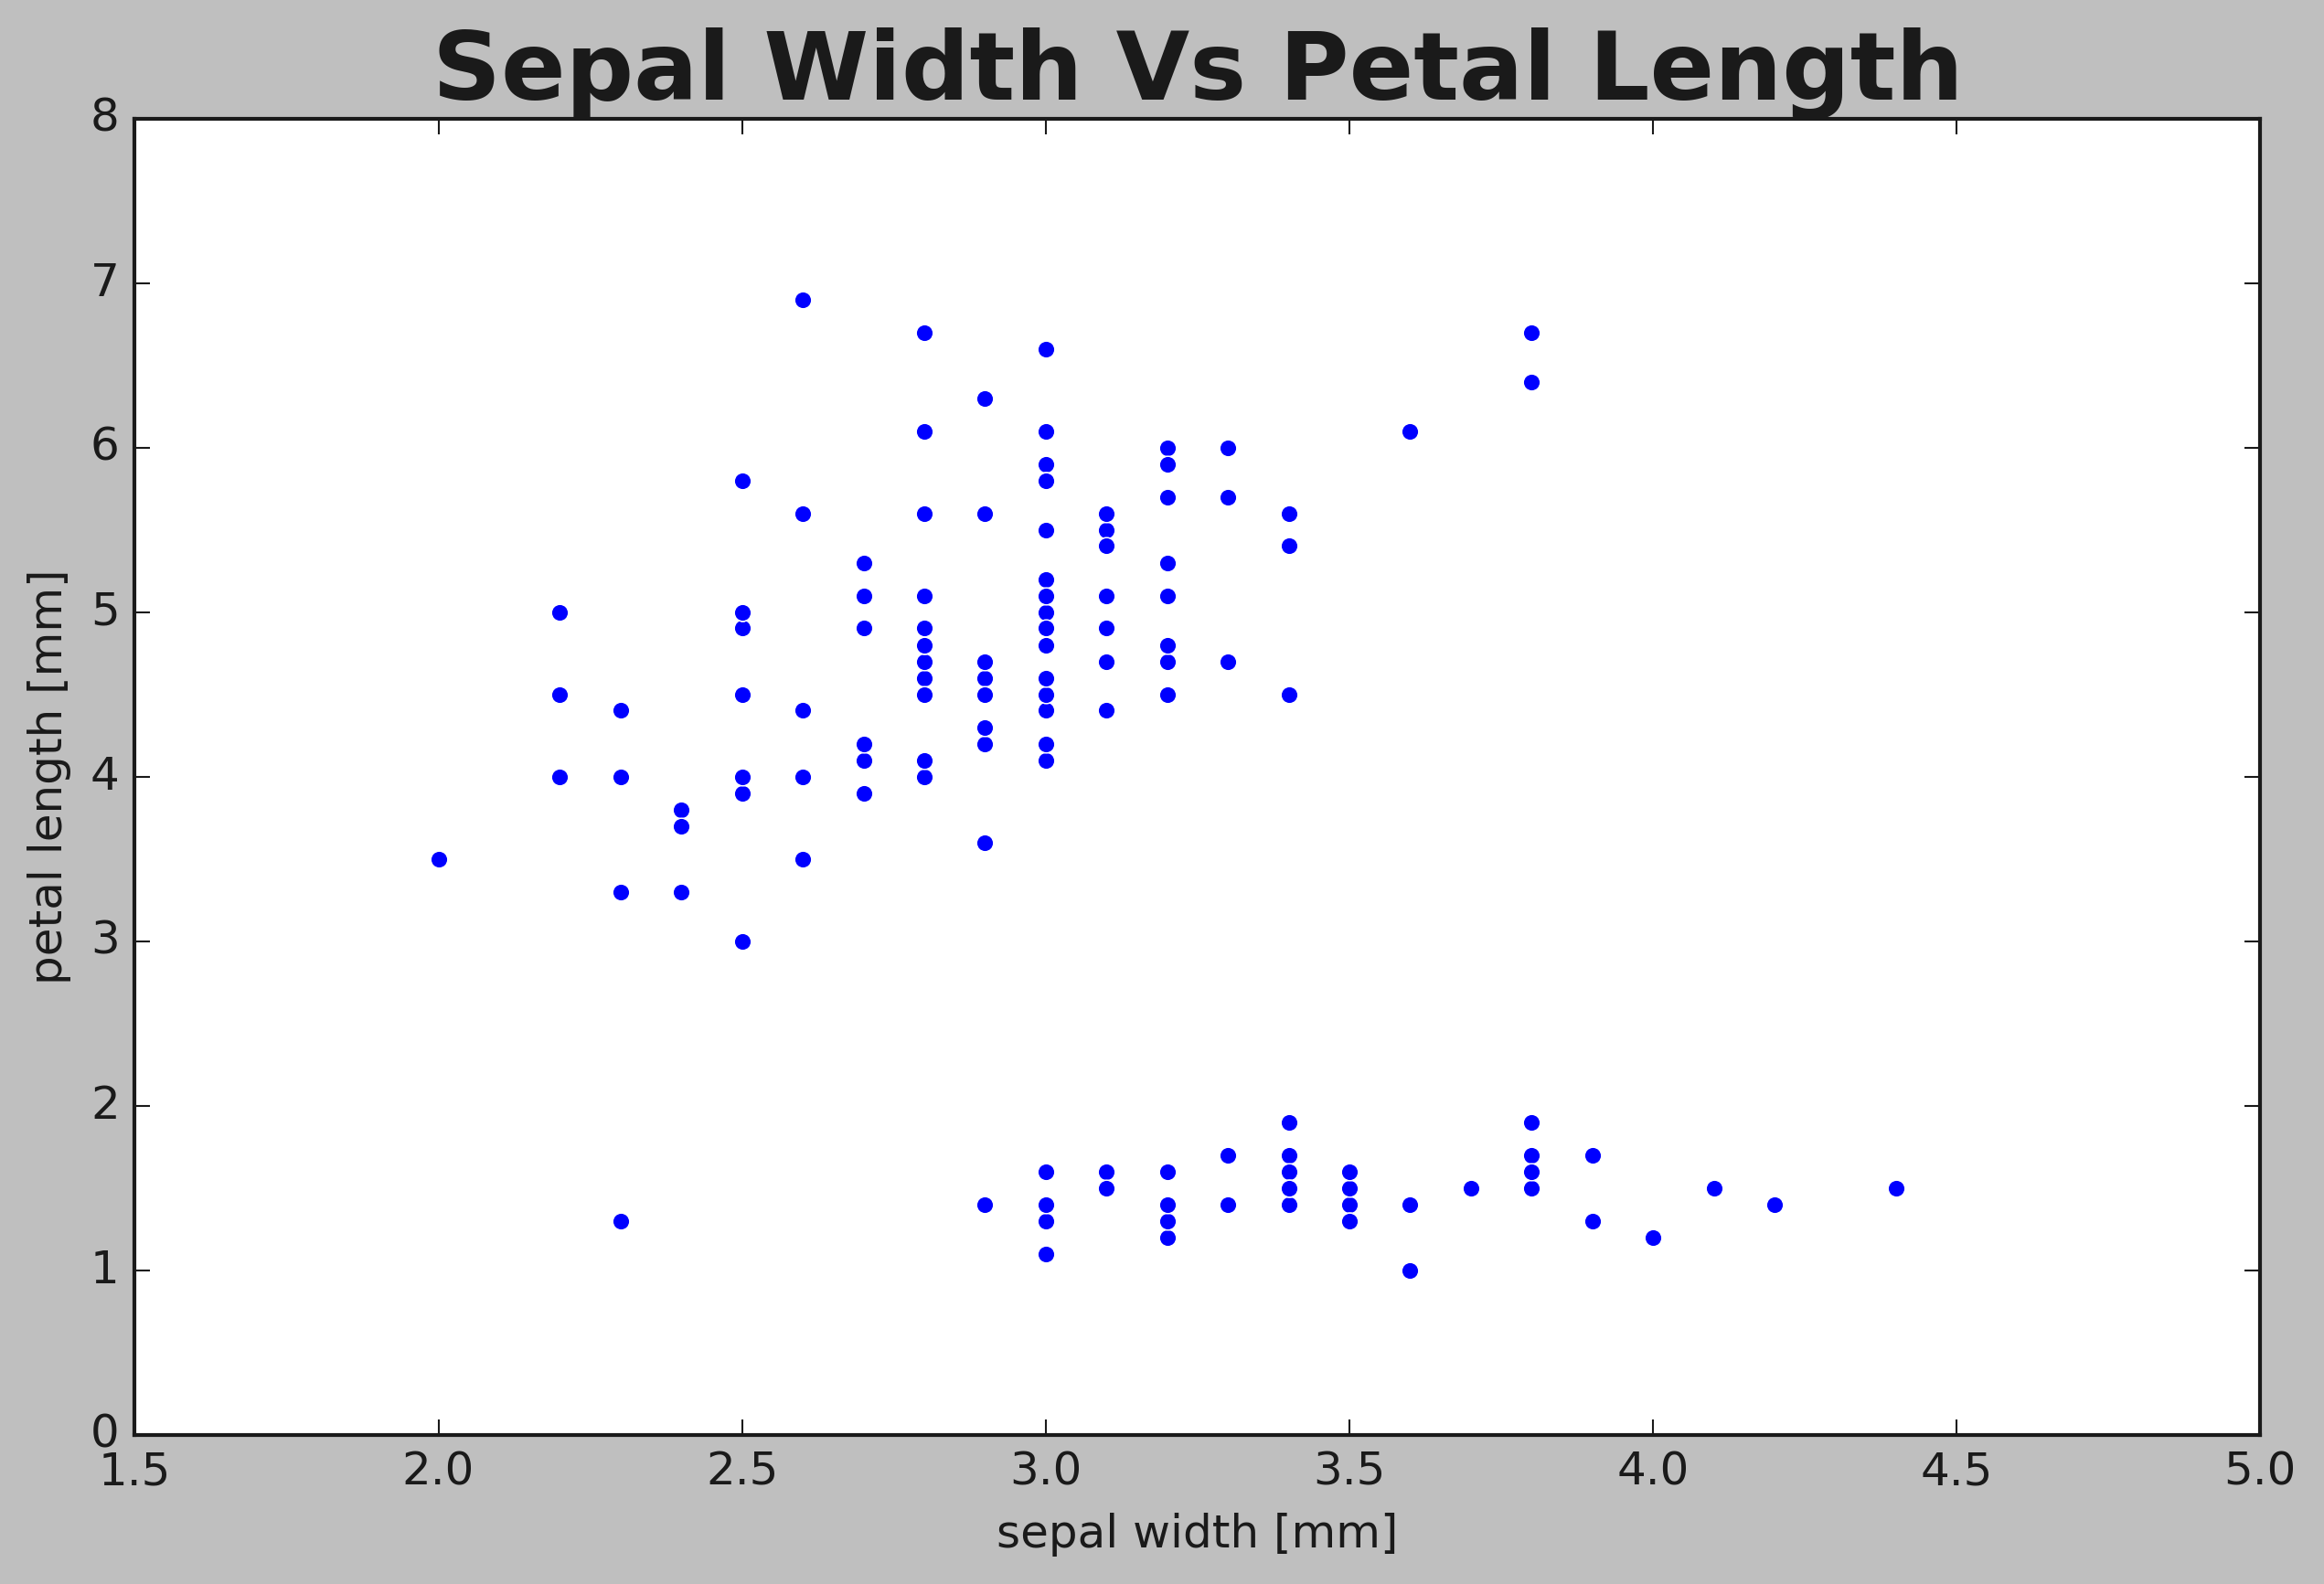

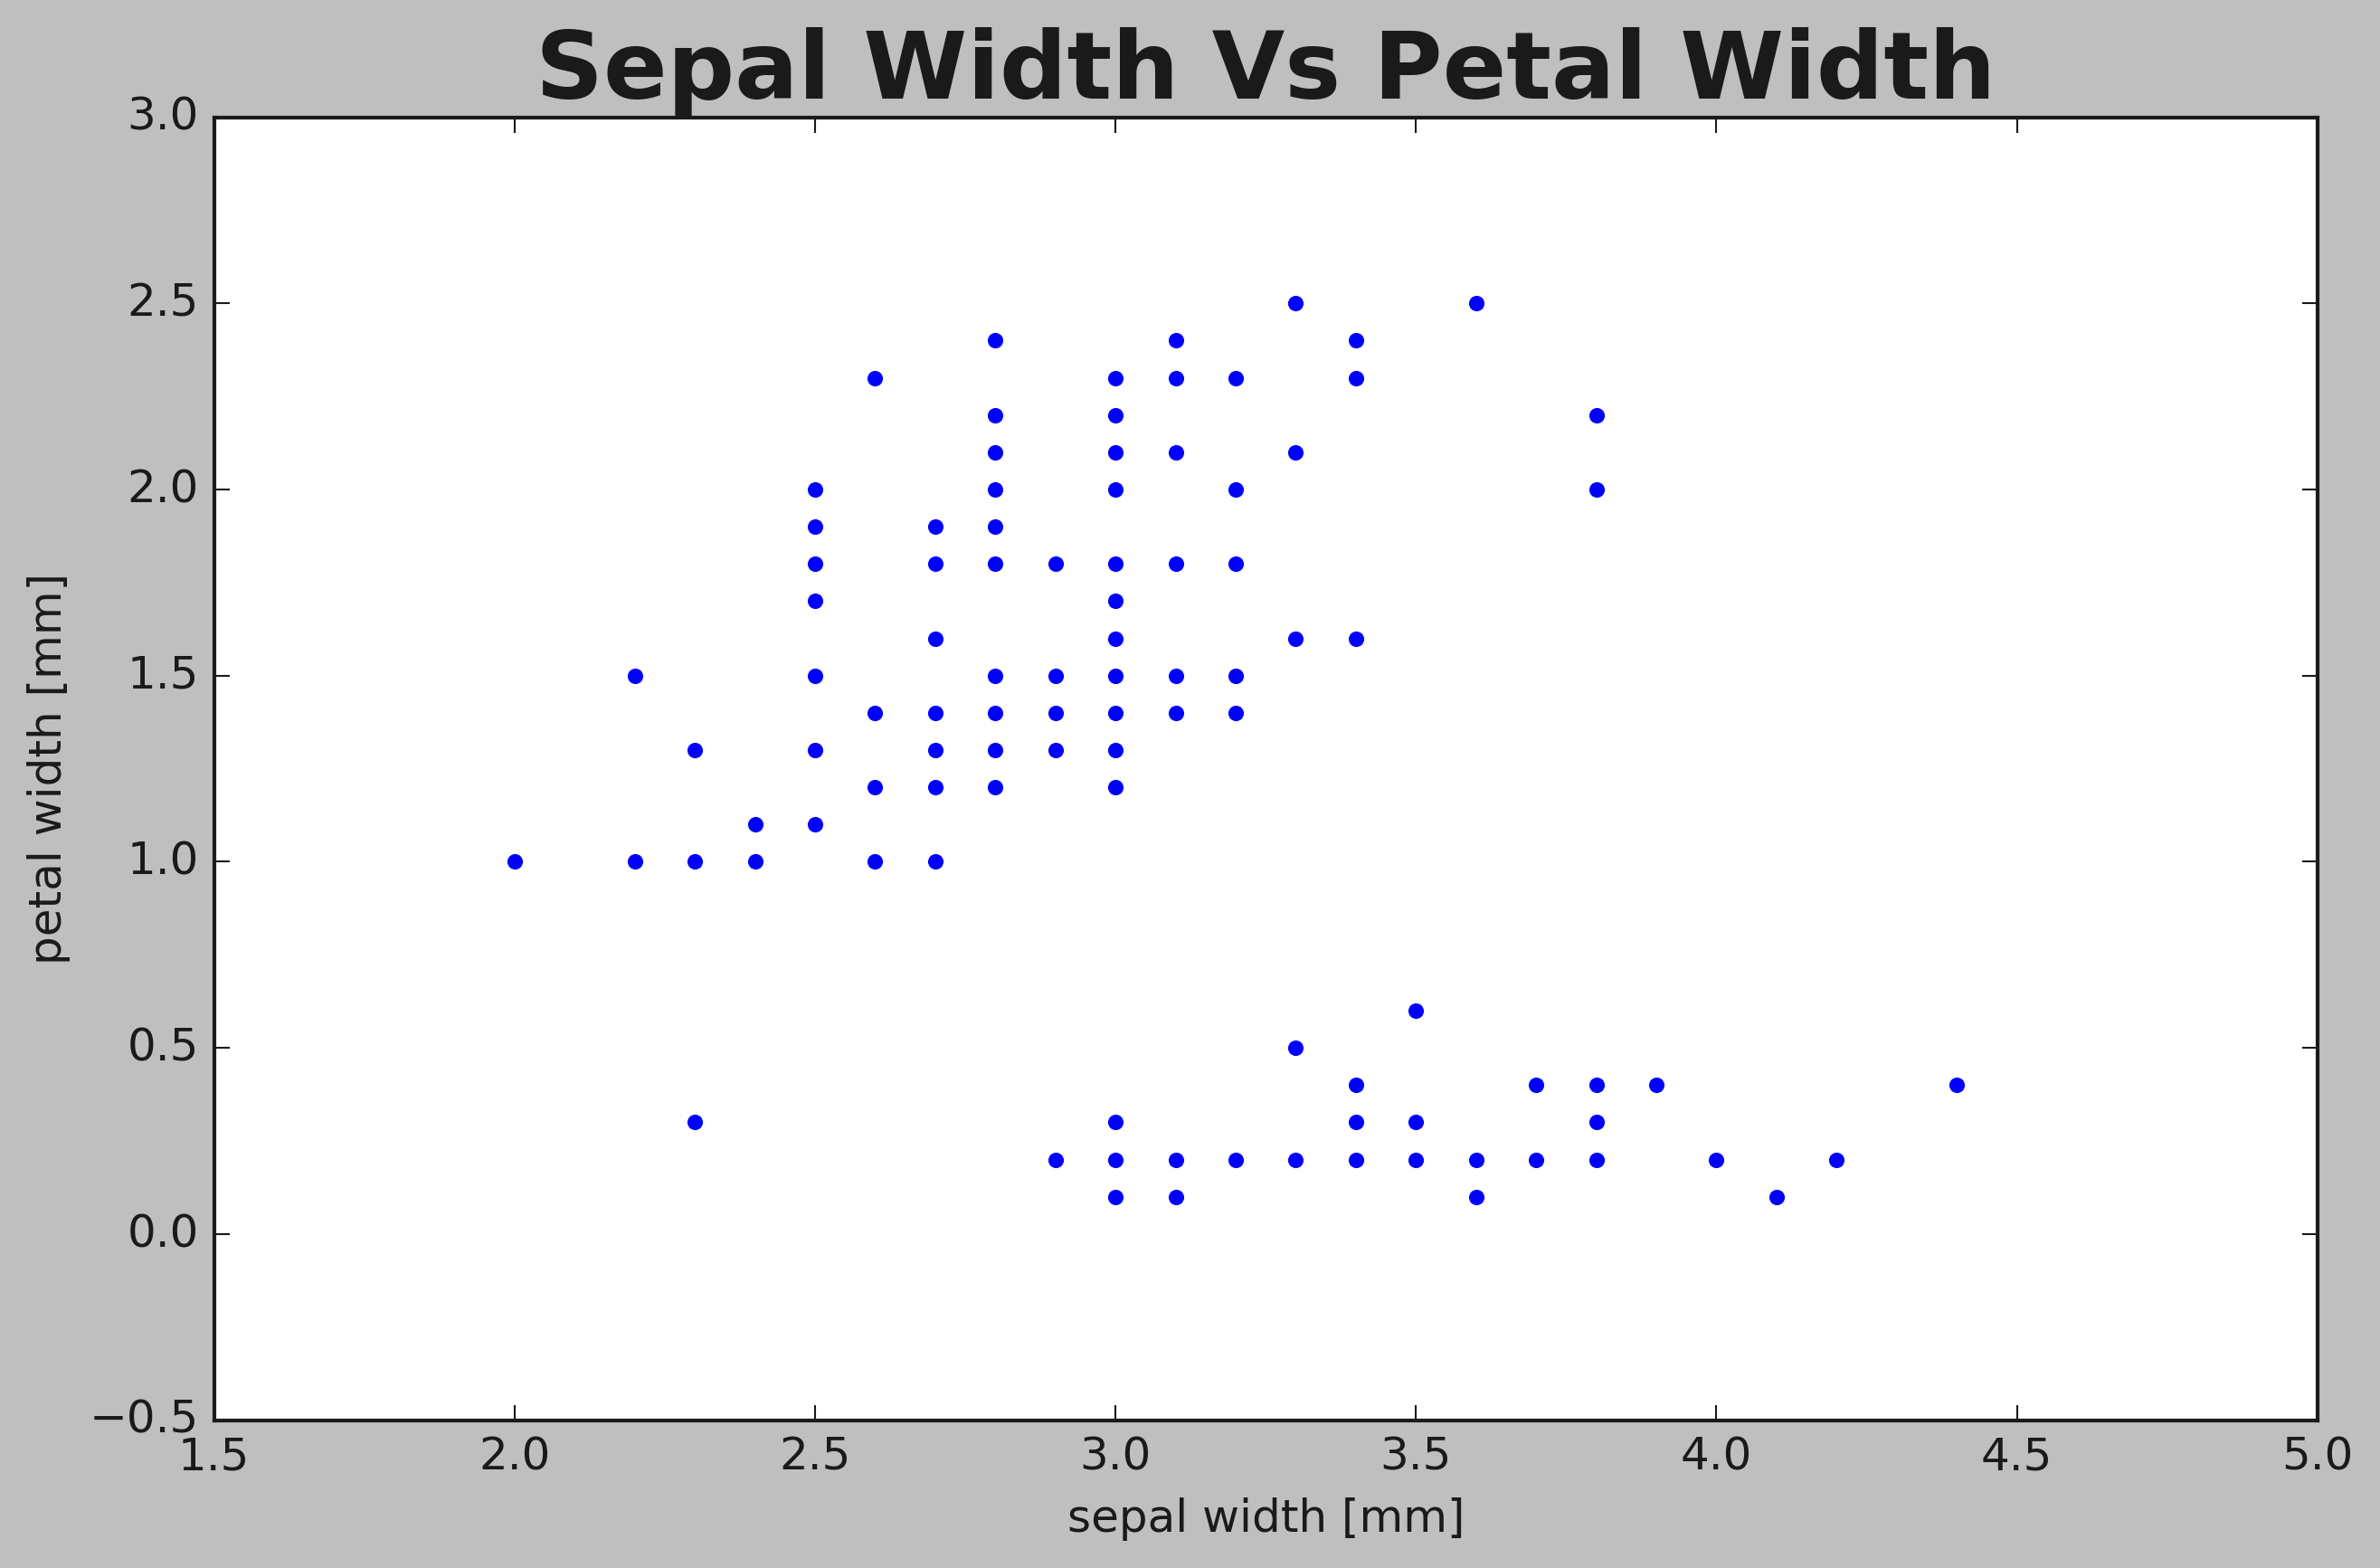

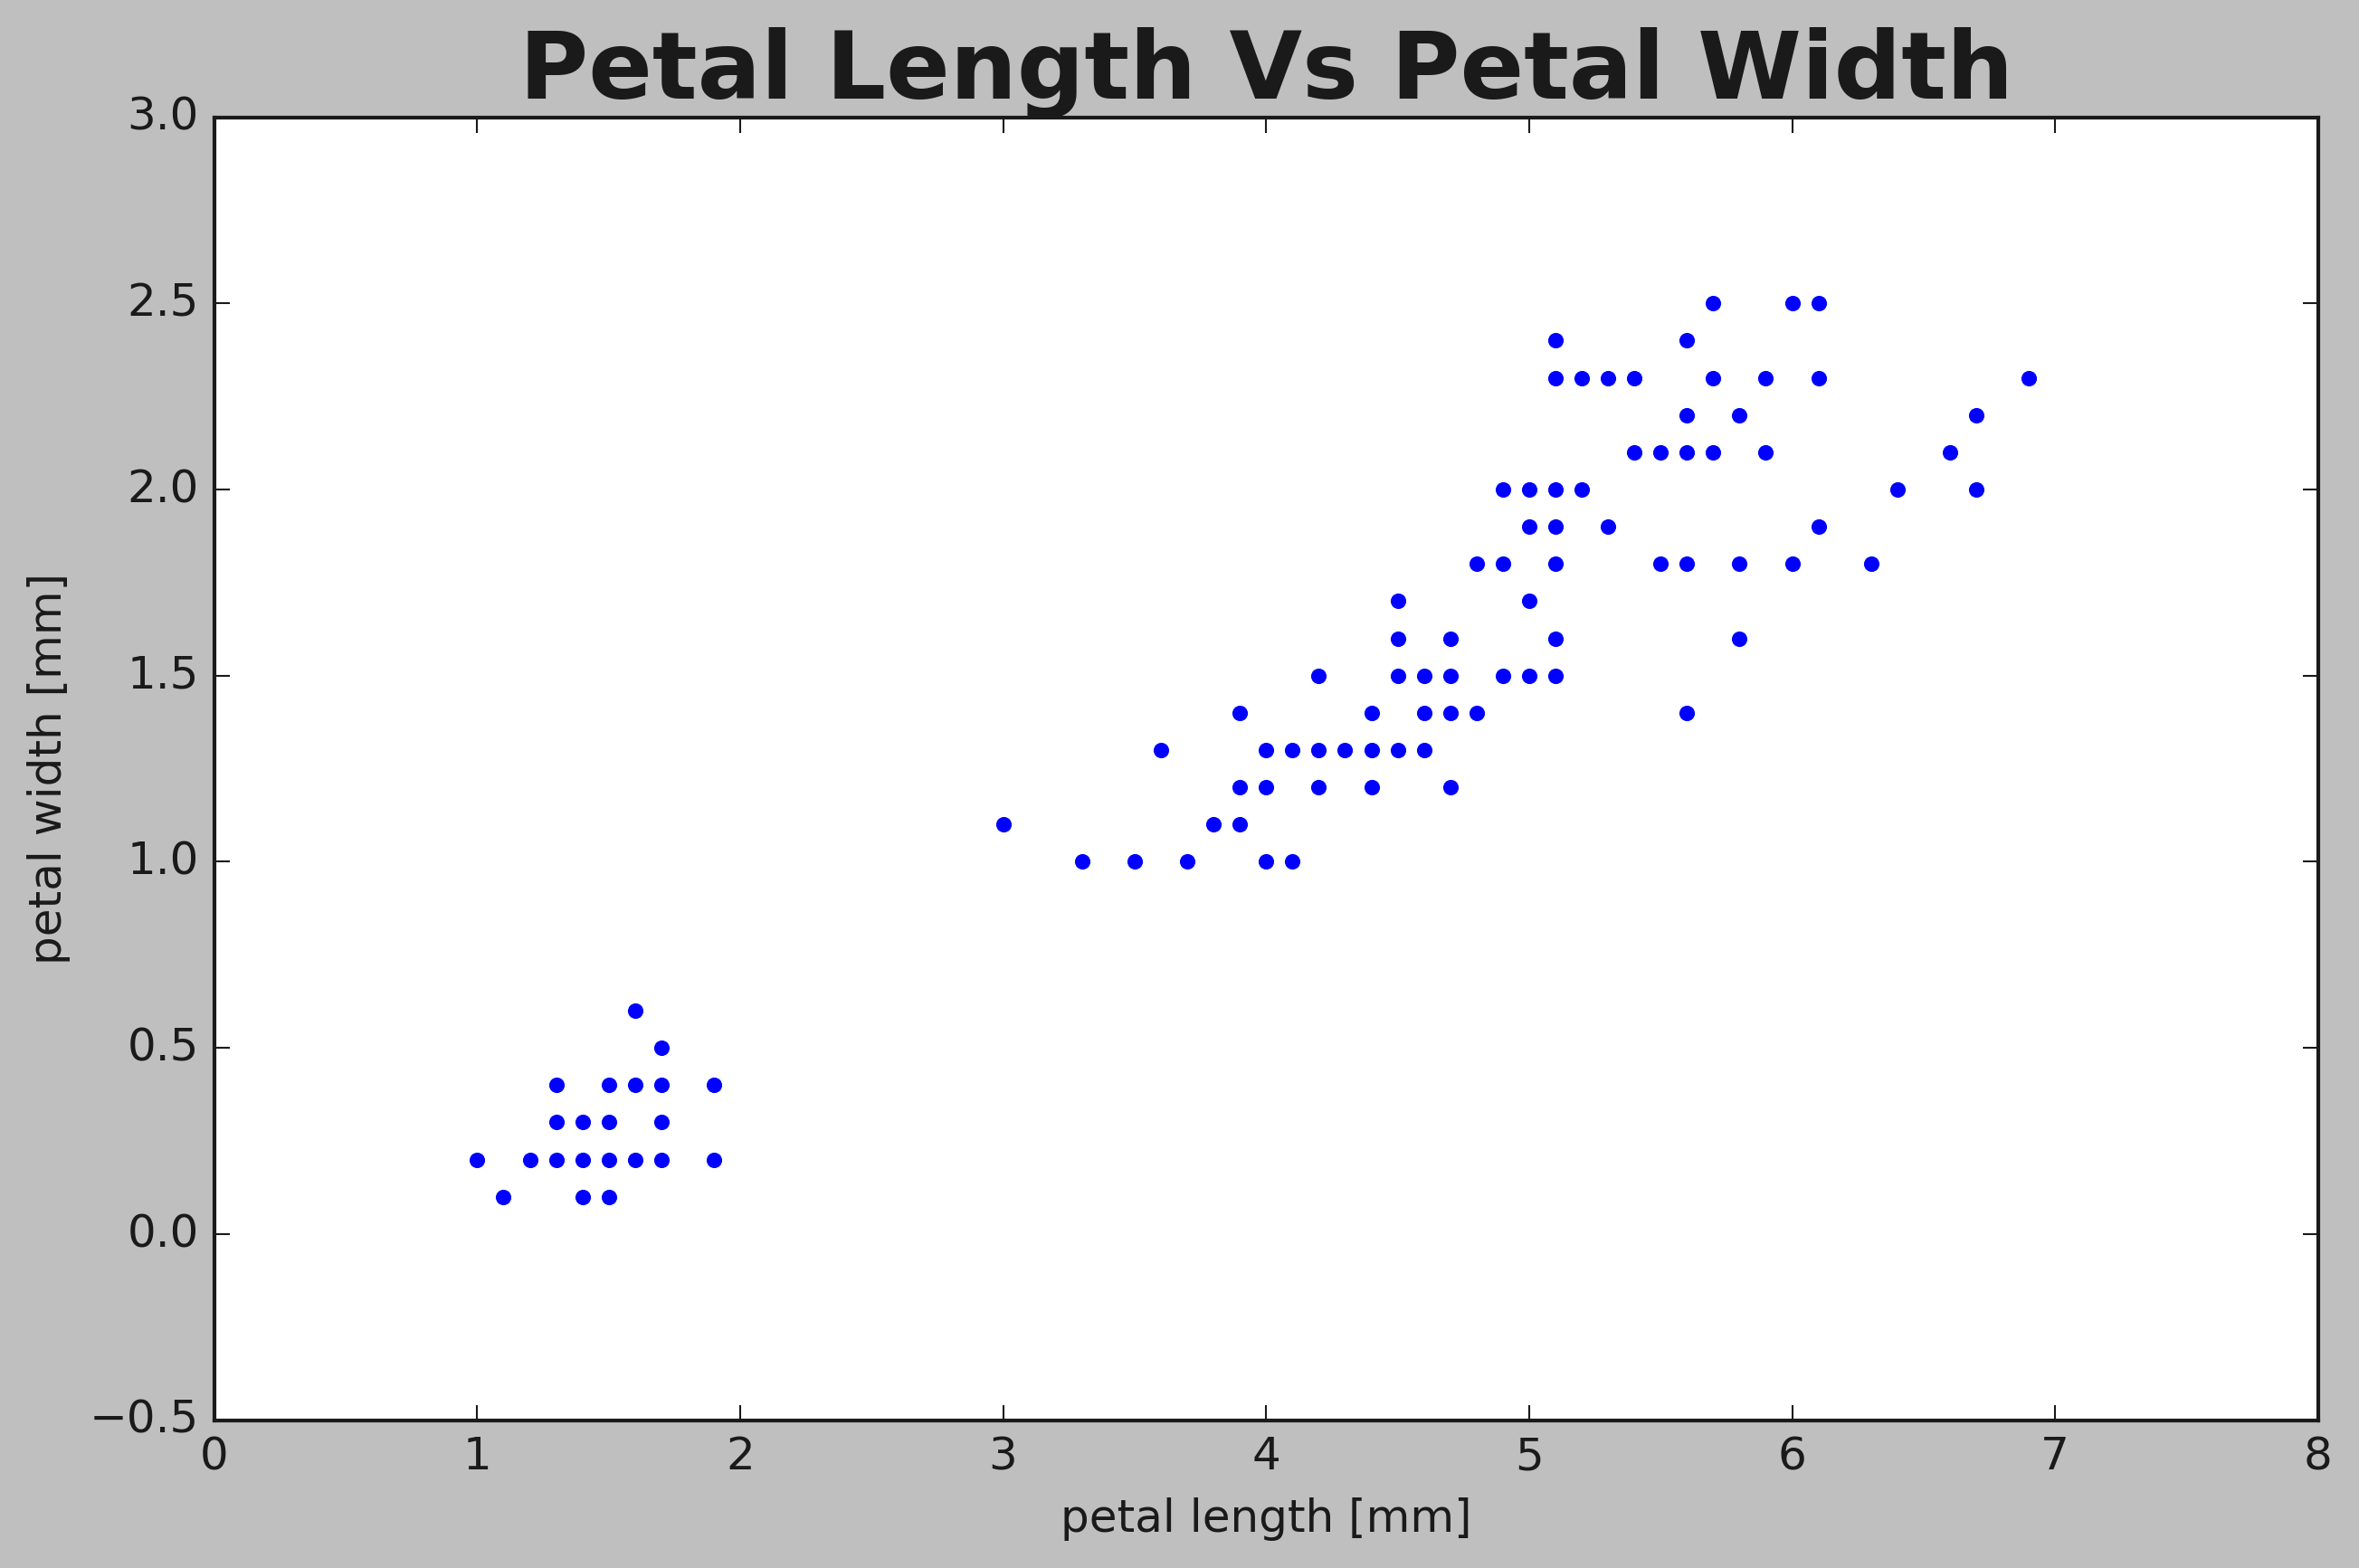

In [230]:
plt.style.use('classic')
for pair in pairs:
    plt.figure(figsize=(10,6), dpi=150)
    sns.scatterplot(x=pair[0], y=pair[1], data=iris, 
                    color='blue') #hue='species')
    plt.title(f'{pair[0]} vs {pair[1]}'.title().replace('_',' '), 
              fontsize= 25, fontweight= 'bold')
    plt.xlabel(f"{pair[0].replace('_',' ')} [mm]")
    plt.ylabel(f"{pair[1].replace('_',' ')} [mm]")
    plt.show()

## Linear regression OLS

# *$y = mx + b$*

# <b>$m = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$</b>

## $b = \bar{y} - m\bar{x}$

In [103]:
cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

[]

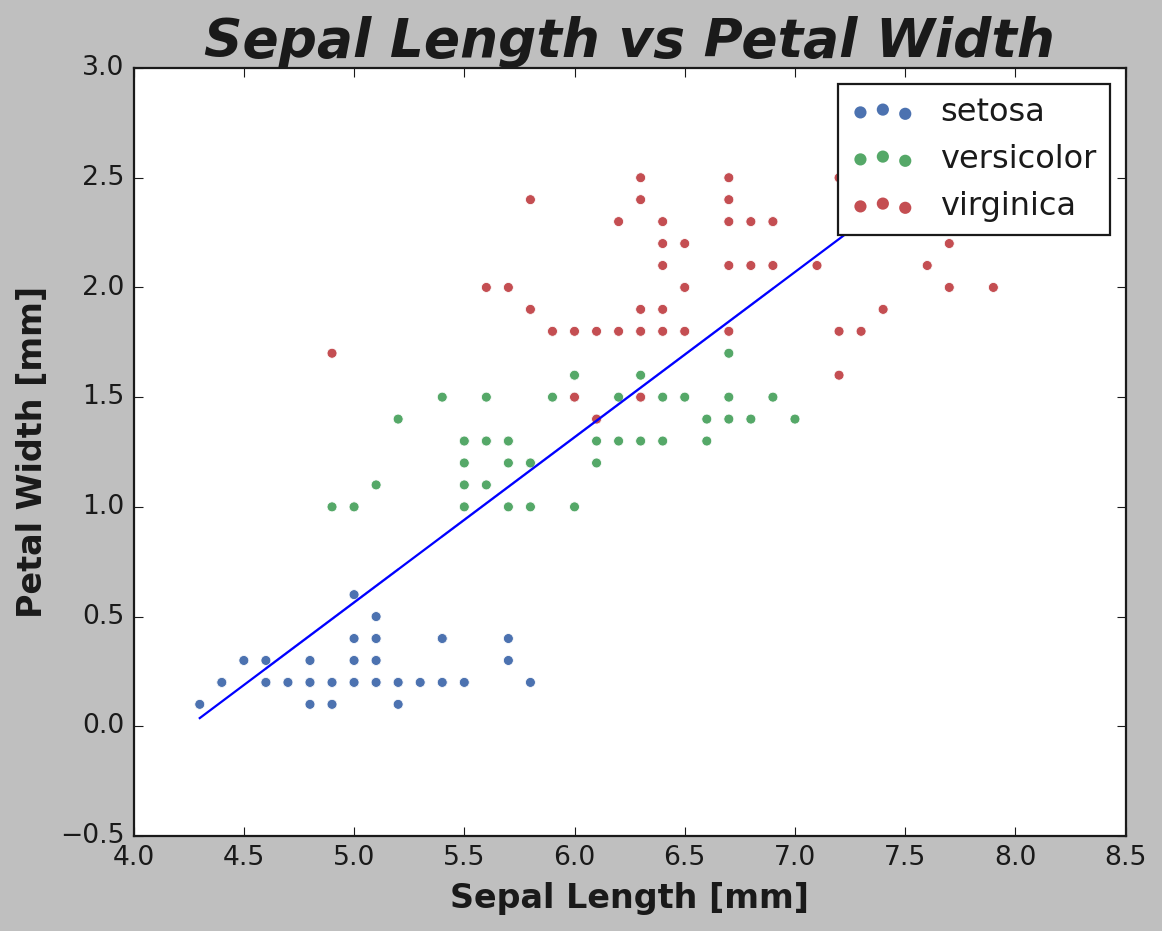

In [247]:
x = iris['sepal_length']
y = iris['petal_width']
m = sum((x - x.mean())*(y-y.mean()))/\
sum((x - x.mean())**2)
b = y.mean() - m * x.mean()
y_hat = m*x + b
sns.scatterplot(x=x, y=y, data=iris, hue='species')
sns.lineplot(x=x, y=y_hat, color='blue')
plt.title('Sepal Length vs Petal Width', fontsize= 24,
         weight= 'bold', style= 'italic')
plt.xlabel('Sepal Length [mm]',fontsize= 15,
         weight= 'bold')
plt.ylabel('Petal Width [mm]', fontsize= 15,
         weight= 'bold')
plt.plot()

In [268]:
px.scatter(iris, x=x, y=y, color='species', trendline='ols')


In [266]:
x = iris['petal_length']
y = iris['petal_width']
m = sum((x - x.mean())*(y-y.mean()))/\
sum((x - x.mean())**2)
b = y.mean() - m * x.mean()
y_hat = m*x + b
fig = px.scatter(iris, x=x, y=y, 
                 color='species')
fig.add_trace(px.line(x=x, y=y_hat).data[0])
fig.show()

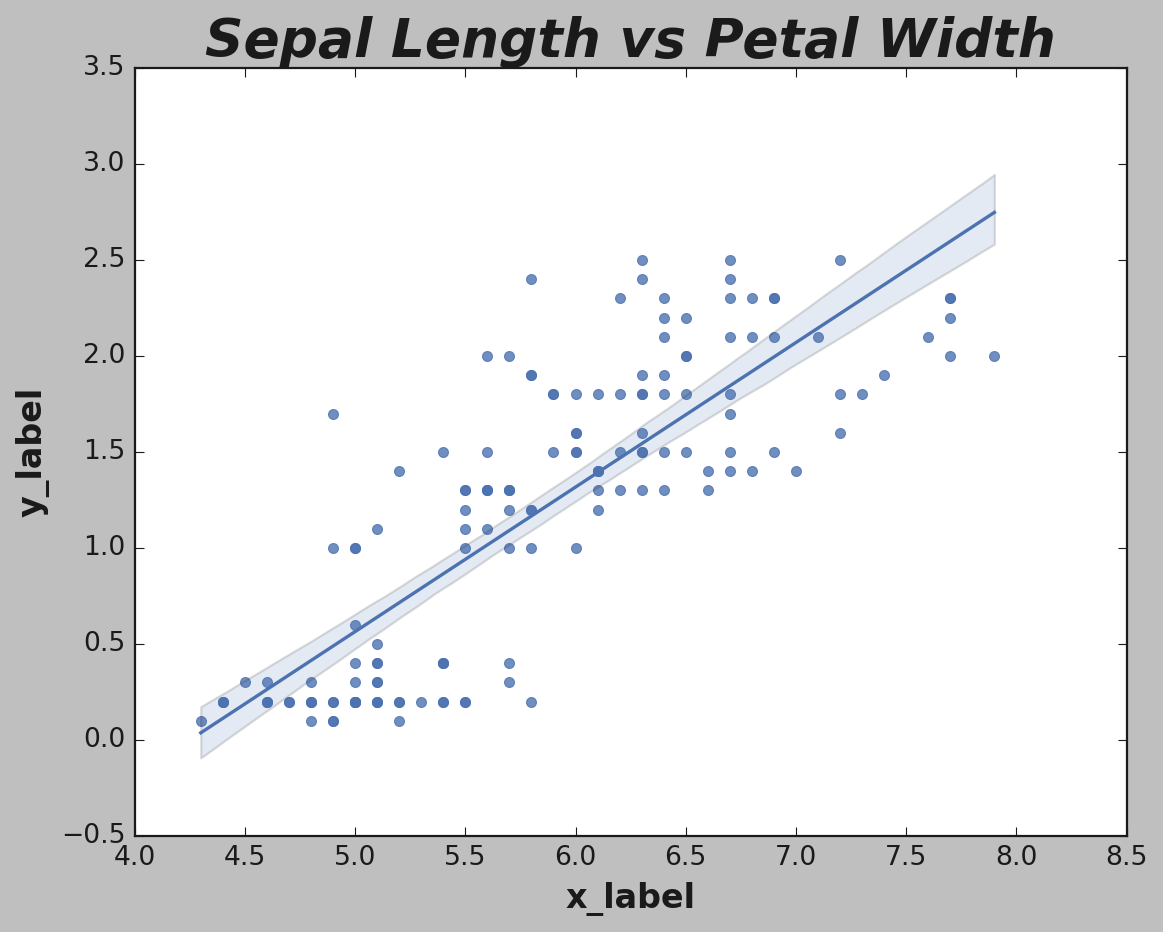

In [244]:
sns.regplot(x=iris['sepal_length'], y=iris['petal_width'])
plt.title('Sepal Length vs Petal Width', fontsize= 24,
         weight= 'bold', style= 'italic')
plt.xlabel('x_label',fontsize= 15,
         weight= 'bold')
plt.ylabel('y_label', fontsize= 15,
         weight= 'bold')
plt.show()

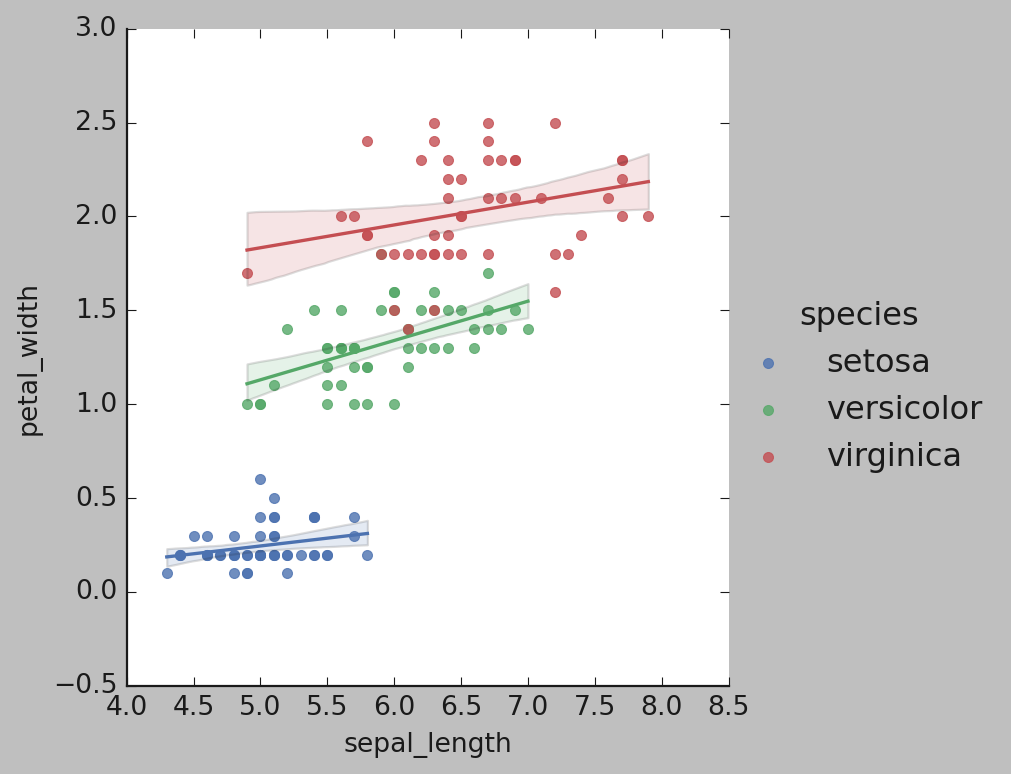

In [236]:
sns.lmplot(x='sepal_length', y='petal_width', 
           data=iris, hue='species')
plt.show()

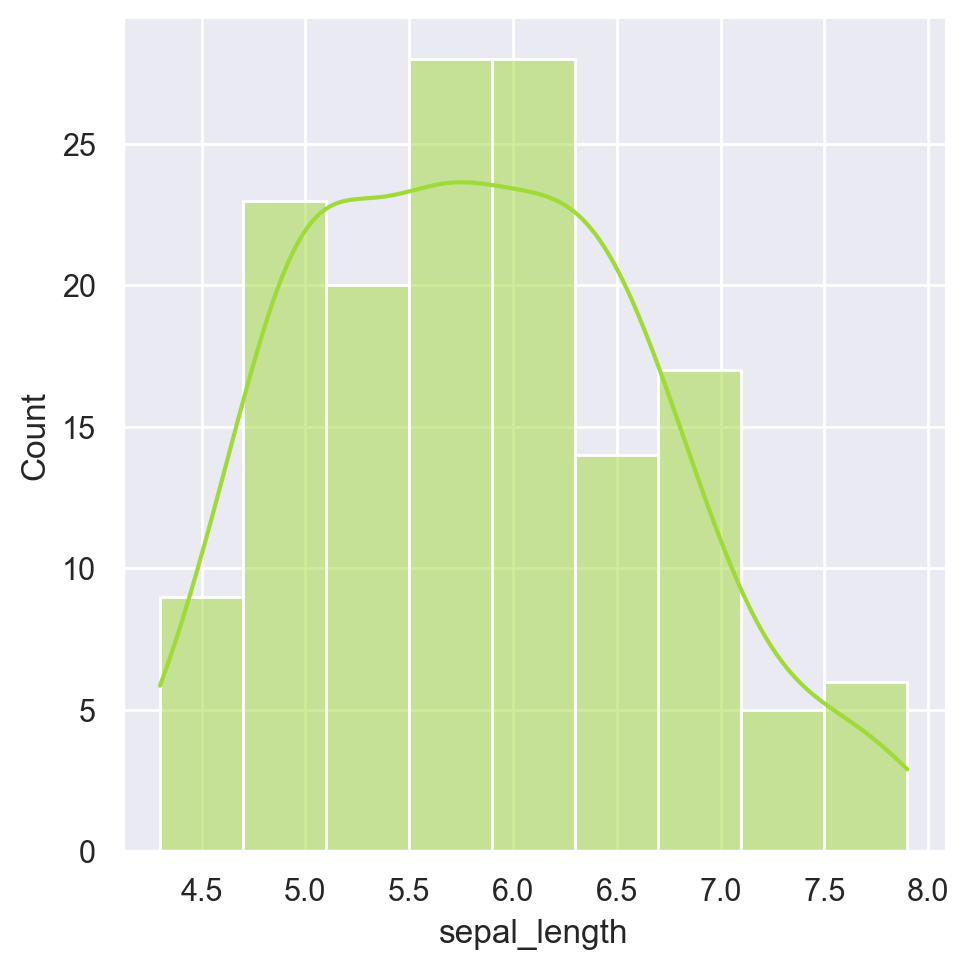

-0.5520640413156395
0.3149109566369728


In [68]:
sns.displot(iris['sepal_length'], kde=True)
plt.show()
print(iris['sepal_length'].kurt())
print(iris['sepal_length'].skew())

In [60]:
%config InlineBackend.figure_format = 'retina'

In [61]:
%%html
<style>
p {text-align: justify !important;
    #color: OldLace;
  line-height: 129%;}
b { text-align: justify;
    color: Cyan;} 
strong { color: LightGreen;
       }
mark { background-color: gainsboro;
  color: crimson;
  padding: 0 0.05em;
  border: 1px solid #orange ;
  border-radius: 2px;
  font-weight: bold;}   
ul {text-align: justify !important;
    color: LightSkyBlue;}    
i {text-align: justify !important;
    color: DeepPink !important;}
em {    text-align: justify;
    color: Yellow;}
dl {text-align: center !important;
    background-color: lawngreen;#LightGreen;
    padding: 1.5em 1.5em;
    color: black;
    font-weight: bold;}   
href { text-aligne: center;
    color: yellow;
    font-weight: bold;}
h1 { text-align: center !important;
    color: orange;
 font-size: 40px !important;
 font-weight: bold !important;}
h2 {text-align: center !important;
     font-size: 36px !important;
     font-weight: bold !important;}
h3 { text-align: center !important;
    font-size: 32px !important;
 font-weight: bold !important;}
h4 { text-align: left !important;
   font-size: 28px !important;}

hr { border-top: 7px dotted DarkOrange; !important;
 #border: 2px solid Fuchsia;
 border-radius: 6px;}
div {
    color: Fuchsia;
    font-weight: bold; !important;
    }
</style>